<img src="../../thu_sigs_logo.png" alt="Ê∏ÖÂçéÊ∑±Á†îÈô¢-Ê®™" style="zoom:50%;" />

In [ ]:
#| default_exp tree

‰ª£Á†ÅÂ§çÁé∞ËØ¥Êòé
```shell
pip install git+https://github.com/Open-Book-Studio/THU-Coursework-Machine-Learning-for-Big-Data.git
pip install ray optuna seaborn matplotlib sklearn
```
Êàë‰ª¨ÁöÑ‰ª£Á†ÅÂØºÂá∫‰∏∫‰∫ÜpythonÊ®°ÂùóÂΩ¢Âºè
```python
from thu_big_data_ml_tree import FastKDTree
```

In [ ]:
#|hide
import matplotlib.pyplot as plt

In [ ]:
#|hide
plt.style.use('default')

## ÂÆûÈ™åÁõÆÁöÑ
> ËÄÅÂ∏àÁªôÊàë‰ª¨ÁöÑË¶ÅÊ±ÇÊòØ
> 1. ÂÆåÊàê KD Ê†ëÁÆóÊ≥ïÔºåÂπ∂Âà©‚Ω§ÂÆûÁé∞ÁöÑÁÆóÊ≥ïÂÆåÊàêÊï∞Â≠óËØÜÂà´‰ªªÂä°
> 2. ÂØπÊâÄÂª∫Ê®°ÂûãËøõË°åÂàÜÊûêËØÑÂà§„ÄÇ

Êàë‰ª¨‰∏ç‰ªÖÂÆåÊàê‰ª•‰∏äÂÜÖÂÆπÔºåËøòËøõË°å‰∫Ü
1. ÂèÇËÄÉË∞∑Ê≠åË∞ÉÂèÇÊâãÂÜåÔºå‰ΩøÁî®ÁßëÂ≠¶ÁöÑÂÆûÈ™åËÆæËÆ°Êù•ÂØπKNNÂàÜÁ±ªÁÆóÊ≥ïÁöÑÂÖÉÂèÇÊï∞ËøõË°åÊêúÁ¥¢Ôºå‰ªéËÄåÂÆûÁé∞Êõ¥È´òÁöÑÂàÜÁ±ªÁ≤æÂ∫¶„ÄÇ
2. ÂèÇËÄÉÂâçÊ≤øËÆ∫ÊñáÔºåÂ∞ùËØï‰øÆÊîπKDÊ†ëÁöÑËÆ≠ÁªÉÁ≠ñÁï•Ôºå‰ªéËÄåÂØπKDÊ†ëÁöÑÊé®ÁêÜÈÄüÂ∫¶ËøõË°åÊîπËøõ„ÄÇ

## ÂÆûÈ™åÊï∞ÊçÆ
> MNIST Êï∞ÊçÆÂ∫ìÊòØÁî± Yann et. al. Êèê‰æõÁöÑ‚ºøÂÜôÊï∞Â≠óÊï∞ÊçÆÂ∫ì‚ΩÇ‰ª∂, ÂÆòÁΩëÂú∞ÂùÄ‰∏∫ http://yann.lecun.com/exdb/mnist/„ÄÇ
> ‰∏ªË¶ÅÂåÖÂê´‰∫Ü 60000 Âº†ÁöÑËÆ≠ÁªÉÂõæÂÉèÂíå 10000 Âº†ÁöÑÊµãËØïÂõæÂÉè
> ```python
> from sklearn.datasets import fetch_openml
> from sklearn.model_selection import train_test_split
> from sklearn.neighbors import KNeighborsClassifier
> from sklearn.metrics import accuracy_score
> import numpy as np
> # Ëé∑ÂèñMNISTÊï∞ÊçÆÈõÜ,Âπ∂ÊäΩÊ†∑‰∏ÄÈÉ®ÂàÜÊï∞ÊçÆ‰ª•‰æøÂêéÁª≠ÁöÑËÆ°ÁÆó
> idx = np.random.choice(70000,5000,replace=False)
> mnist = fetch_openml("mnist_784")
> X, y = mnist.data.to_numpy(), mnist.target.to_numpy().astype('int')
> X = X[idx]
> y = y[idx]
> # ÂàíÂàÜÊï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
> 
> ```



‰ª•‰∏ä‰ª£Á†ÅÊúâÂá†‰∏™Â∞èÈóÆÈ¢òÔºåÊàë‰ª¨ÈúÄË¶ÅÊîπËøõ‰∏Ä‰∏ã
1. Áî±‰∫éÁΩëÁªúÁéØÂ¢ÉÈóÆÈ¢òÔºåfetch_openml("mnist_784") ÊòØÊó†Ê≥ïË∑ëÈÄöÁöÑÔºå‰ºöÂç°Ê≠ª„ÄÇ
‰∫ãÂÆû‰∏äÔºåÁªôsklearnË¥°ÁåÆËøá‰ª£Á†ÅÁöÑÂêåÂ≠¶ÂèØËÉΩÁü•ÈÅìÔºåsklearnËøòÊúâ‰∏Ä‰∏™load_digitsÊï∞ÊçÆÈõÜÔºåËøô‰∏™Êï∞ÊçÆÈõÜÊòØsklearn CIÔºàÊåÅÁª≠ÈõÜÊàêÔºâÊµãËØïÁî®‰æãÁöÑ‰∏ÄÈÉ®ÂàÜ„ÄÇËøô‰∏™ÂõûÂΩíÊµãËØïÈÄöËøáÊµãËØïË¥°ÁåÆËÄÖÁöÑÊñ∞ÂÅöÁöÑÊîπËøõÊòØÂê¶ÂØºËá¥ÊÄßËÉΩ‰∏çÂ¶Ç‰ª•ÂâçÁöÑÁâàÊú¨ÔºåÊù•ÂÜ≥ÂÆöÊòØÂê¶Êé•ÂèóÊõ¥Êîπ„ÄÇ
Âõ†Ê≠§ÔºåÊàë‰ª¨‰ΩøÁî®load_digitsÊï∞ÊçÆÈõÜ‰ª£Êõømnist_784Êï∞ÊçÆÈõÜÊù•ÂÆåÊàêËøô‰∏™È°πÁõÆ„ÄÇ

https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_digits.html

2. ÂàíÂàÜÊï∞ÊçÆÈõÜÊó∂Ôºåtrain_test_splitÂ∫îÂΩì‰ΩøÁî®stratifyÂèÇÊï∞Ôºå‰ª•Á°Æ‰øùÊØè‰∏ÄÁ±ªÊ†∑Êú¨ÁöÑÊØî‰æãÁõ∏Âêå„ÄÇ
3. importËøáÂ§öÔºåÂ∫îËØ•Âè™ÂØºÂÖ•ÈúÄË¶ÅÁöÑÊ®°Âùó„ÄÇ

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
dataset_dict = load_digits()
dataset_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
import numpy as np

In [ ]:
X:np.array = dataset_dict['data']
y:np.array = dataset_dict['target']
X.shape, X.dtype, y.shape, y.dtype

((1797, 64), dtype('float64'), (1797,), dtype('int64'))

ÂàíÂàÜÊï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, 
                                                    stratify=y)
len(X_train), len(X_test)

(1437, 360)

## ÂÆûÈ™åÂÜÖÂÆπ
### KNNÂíåKDÊ†ëÁöÑÂÖ≥Á≥ªÊòØ‰ªÄ‰πàÔºü‰ªÄ‰πàÂè´Âü∫‰∫éKDÊ†ëÁöÑKNNÁÆóÊ≥ïÔºü

Âú®Êàë‰ª¨ÂºÄÂßãÂÆûÈ™åÂÜÖÂÆπ‰πãÂâçÔºåÊúâÂøÖË¶ÅÊæÑÊ∏ÖËøô‰∏ÄÁêÜËÆ∫‰∏äÁöÑÊ¶ÇÂøµ„ÄÇ

KNNÔºàK-Nearest NeighborÔºâÁÆóÊ≥ïÊòØ‰∏ÄÁßçÂü∫Êú¨ÁöÑÊú∫Âô®Â≠¶‰π†ÁÆóÊ≥ïÔºåÊó¢ÂèØ‰ª•Áî®‰∫éÂàÜÁ±ª‰πüÂèØ‰ª•Áî®‰∫éÂõûÂΩí„ÄÇ
ÂØπ‰∫éÊñ∞ÁöÑ‰∏Ä‰∏™ÊµãËØïÊ†∑Êú¨ÔºàÊú™Áü•Á±ªÂà´ÊàñÊ†áÁ≠æÂÄºÔºâÊù•ËØ¥ÔºåÂÆÉÂíåËÆ≠ÁªÉÈõÜ‰∏≠ÊØè‰∏Ä‰∏™Ê†∑Êú¨ÈÉΩÊúâË∑ùÁ¶ªÔºå‰ªéËÄåÂ≠òÂú®Á¶ªÊµãËØïÊ†∑Êú¨ÊúÄËøëÁöÑK‰∏™Ê†∑Êú¨ÔºàÂΩìÁÑ∂ËÆ≠ÁªÉÈõÜË¶ÅÂ§ß‰∫éKÂï¶ÔºâÔºåÁÑ∂ÂêéÊ†πÊçÆËøô‰∫õÊ†∑Êú¨ÁöÑÂ∑≤Áü•Ê†áÁ≠æÊù•ÂÜ≥ÂÆöÊµãËØïÊ†∑Êú¨ÁöÑÊ†áÁ≠æ„ÄÇ

> Êàë‰ªäÂ§©Â≠¶‰π†ÁöÑ„ÄäËá™ÁÑ∂Ëæ©ËØÅÊ≥ïËØæ„Äã‰∏äÊ≠£Â•ΩËÆ≤Âà∞‰∏Ä‰∏™Âì≤Â≠¶Ê¶ÇÂøµÂè´ÂÅö‚ÄúÁ±ªÊØîÊé®ÁêÜ‚Äù‰∏é‚ÄúÊºîÁªéÊé®ÁêÜ‚Äù„ÄÇÂè§Â∏åËÖäÁöÑÂì≤Â≠¶ÂÆ∂‰ª¨ÂàôÂèëÂ±ï‰∫ÜÂΩ¢ÂºèÈÄªËæëÔºåÊØîÂ¶Ç‰∫öÈáåÂ£´Â§öÂæ∑ÁöÑ‰∏âÊÆµËÆ∫ÔºåÊàë‰ª¨Âú®„ÄäÊï∞ÁêÜÈÄªËæëÂØºËÆ∫„ÄãËØæ‰∏äËøò‰∫ÜËß£‰∫ÜÁΩóÁ¥†„ÄÅÂì•Âæ∑Â∞îÁ≠â‰∫∫ÂØπÊï¥Â•óÈÄªËæëÁöÑËøõ‰∏ÄÊ≠•ÂèëÂ±ï„ÄÇËÄå‰∏≠ÂõΩÂè§‰ª£ÁöÑÂÖàË¥§ÂæàÂñúÊ¨¢Á±ªÊØîÊé®ÁêÜÔºåÊØîÂ¶ÇÂ≠üÂ≠êË¶ÅÊèêÂÄ°‚ÄúËàçÁîüËÄåÂèñ‰πâËÄÖ‰πü‚ÄùÔºåÂÅèÂÅè‰∏çÂíå‰Ω†ËÆ∫ËØÅ‰∏∫‰ªÄ‰πàË¶ÅËàçÁîüÂèñ‰πâÔºàÂêéÊñá‰πüÊúâ‰∏ÄÁÇπËÆ∫ËØÅÔºâÔºåËÄåÊòØÂÖàË∑ü‰Ω†ËØ¥‰ªñËßÇÂØüÂà∞‰∫Ü‚Äú‰∫åËÄÖ‰∏çÂèØÂæóÂÖºÔºåËàçÈ±ºËÄåÂèñÁÜäÊéåËÄÖ‰πü„ÄÇ‚ÄùÔºåÁÑ∂Âêé‰ªñËÆ§‰∏∫Ëøô‰∏§‰∏™‰∫ãÊÉÖÂæàÂÉèÔºåÁÑ∂ÂêéÂëäËØâ‰Ω†ÊâÄ‰ª•Ë¶ÅËàçÁîüÂèñ‰πâÔºõÂèàÊØîÂ¶ÇÂ≠üÂ≠êÊÉ≥Ë¶ÅËØ¥‚ÄúÂ§©Â∞ÜÈôçÂ§ß‰ªª‰∫éÊòØ‰∫∫‰πüÔºåÂøÖÂÖàËã¶ÂÖ∂ÂøÉÂøó‚ÄùÔºå‰ªñÂÖàÁªô‰∫Ü‰Ω†‰∏Ä‰∏™ËÆ≠ÁªÉÈõÜÔºåËØ¥Â•ΩÂ§ö‚ÄúÈôçÂ§ß‰ªª‚ÄùÁöÑ‚Äú‰∫∫‚ÄùÈÉΩÊòØË¢´‚ÄúËã¶ÂÖ∂ÂøÉÂøóÁöÑ‚Äù„ÄÇËøô‰∏™Êé®ÁêÜÁúãËµ∑Êù•ÂæàÊâØÔºåÂÆûÈôÖ‰∏ä‰πüÊòØ‰πüÊòØÊúâ‰∏ÄÂÆöÁöÑÁªüËÆ°ÊÑè‰πâÁöÑ„ÄÇ

ËÄåKDÊ†ëÔºàk-dimensional treeÔºâÊòØ‰∏ÄÁßçÁî®‰∫éÁªÑÁªákÁª¥Á©∫Èó¥Êï∞ÊçÆÁöÑÊ†ëÂΩ¢Êï∞ÊçÆÁªìÊûÑÔºåÂÆÉÊòØ‰∏ÄÁßçÁâπÊÆäÁöÑ‰∫åÂèâÊ†ë„ÄÇKDÊ†ëÂ∞ÜkÁª¥Á©∫Èó¥ËøõË°åÂàÜÂâ≤ÔºåÊØè‰∏™ËäÇÁÇπ‰ª£Ë°®‰∏Ä‰∏™kÁª¥Ë∂ÖÁü©ÂΩ¢Âå∫Âüü„ÄÇKDÊ†ëÁöÑ‰∏ªË¶Å‰ΩúÁî®ÊòØÂú®È´òÁª¥Á©∫Èó¥‰∏≠Âø´ÈÄüÂú∞ËøõË°åÊúÄËøëÈÇªÊü•ÊâæÔºåÂÆÉËÉΩÂ§üÊòæËëóÂáèÂ∞ëÂú®KNNÁÆóÊ≥ï‰∏≠ËÆ°ÁÆóÊâÄÊúâËÆ≠ÁªÉÊ†∑Êú¨‰∏éÊµãËØïÊ†∑Êú¨‰πãÈó¥Ë∑ùÁ¶ªÁöÑÈúÄÊ±ÇÔºå‰ªéËÄåÊèêÈ´òÊïàÁéá„ÄÇ

KNN‰∏ç‰∏ÄÂÆöË¶Å‰ΩøÁî®KDÊ†ëÊù•ËøõË°åËøëÈÇªÊêúÁ¥¢Ôºå‰∫ãÂÆû‰∏äËøòÊúâÂÖ∂‰ªñÊõ¥Âä†È´òÊïàÁöÑÊï∞ÊçÆÁªìÊûÑÔºåÊØîÂ¶ÇBall Tree„ÄÇÂ¶ÇÊûúÊàë‰ª¨ËØ¥ÈªòËÆ§ÁöÑKNNÊòØÁî®Êö¥ÂäõÊñπÊ≥ïËÆ°ÁÆóÊâÄÊúâË∑ùÁ¶ªÁöÑÈÄê‰∏ÄÊØîËæÉÁöÑËØùÔºåÊàë‰ª¨ÂèØ‰ª•ËØ¥KDÊ†ë‰∏çÊòØKNNÁÆóÊ≥ïÁöÑ‰∏ÄÈÉ®ÂàÜÔºåËÄåÊòØKNNÁÆóÊ≥ïÁöÑ‰∏Ä‰∏™‰ºòÂåñÂ∑•ÂÖ∑ÔºåÁî®‰∫éÂú®È´òÁª¥Á©∫Èó¥‰∏≠Âø´ÈÄüÊü•ÊâæÊúÄËøëÈÇª„ÄÇ


### Âü∫‰∫ésklearnÁöÑKNNÁÆóÊ≥ïÂÆûÁé∞ÊâãÂÜôÊï∞Â≠óËØÜÂà´

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# ÂàõÂª∫KNeighborsClassifierÊ®°ÂûãÔºå‰ΩøÁî®kdÊ†ë‰Ωú‰∏∫ÊêúÁ¥¢ÁÆóÊ≥ï
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')

# Âú®ËÆ≠ÁªÉÈõÜ‰∏äËÆ≠ÁªÉÊ®°Âûã
knn.fit(X_train, y_train)

# Âú®ÊµãËØïÈõÜ‰∏äËøõË°åÈ¢ÑÊµã
y_pred = knn.predict(X_test)

# ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

KNN Accuracy: 98.61%


### Ëá™Â∑±ÂÆûÁé∞KDÊ†ë

In [ ]:
#| export

# ÂÆö‰πâKDÊ†ëËäÇÁÇπÁ±ª
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data #ËäÇÁÇπÊú¨Ë∫´ÁöÑÊï∞ÊçÆ
        self.left = left #ËäÇÁÇπÁöÑÂ∑¶Â≠êÊ†ë
        self.right = right #ËäÇÁÇπÂè≥Â≠êÊ†ë

# ÈÄíÂΩíÊñπÊ≥ïÊûÑÂª∫KDÊ†ë

def build_kd_tree(X, depth=0):
    if len(X) == 0:
        return None
    k = X.shape[1]
    axis = depth % k #Ê†πÊçÆÂΩìÂâçÊ∑±Â∫¶ÔºåÈÄâÊã©ÂàíÂàÜÁöÑÁª¥Â∫¶
    X = X[X[:, axis].argsort()]
    median = X.shape[0] // 2 #Â∞ÜÂΩìÂâçÁªìÁÇπÊï∞ÊçÆ‰∏ÄÂàÜ‰∏∫‰∫å
    return Node(data=X[median], left=build_kd_tree(X[:median], depth + 1), right=build_kd_tree(X[median + 1:], depth + 1))

# ËÆ°ÁÆóÁÇπ‰πãÈó¥ÁöÑË∑ùÁ¶ªÔºåËøôÈáå‰ΩøÁî®Ê¨ßÂá†ÈáåÂæóË∑ùÁ¶ª
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
#| export
from queue import PriorityQueue

In [ ]:
# ËøôÈáåÊàë‰ª¨ÈúÄË¶ÅÊ≥®ÊÑè‰ΩøÁî®PriorityQueueÁöÑ‰∏Ä‰∏™ÂùëÁÇπÔºåsame priority ‰∏ã ‰ºöÂ¥©Ê∫ÉÔºõ PriorityQueueÊñáÊ°£Ê≤°ÂÜôÔºåheapqÂÜô‰∫Ü
# https://docs.python.org/3/library/heapq.html
class TestNode:
    def __init__(self, point):
        self.point = point


test1 = [
    (-13.30413469565007, 1.2),
    (-9.327379053088816, 0.0),
    (-13.30413469565007, 1.4),
]
test2 = [
    (-13.30413469565007, TestNode(1.2)),
    (-9.327379053088816, TestNode(0.0)),
    (-13.30413469565007, TestNode(1.4)),
]

test3 = [
    (0, TestNode(1.2)),
    (1, TestNode(0.0)),
    (2, TestNode(1.4)),
]

test_pq = PriorityQueue()
for t in test1:
    test_pq.put(t)
print(test_pq.get())
test_pq = PriorityQueue()
for t in test3:
    test_pq.put(t)
print(test_pq.get())
# Ê≥®ÊÑèËøôÁßçÊÉÖÂÜµ‰∏ãÊä•Èîô
# for t in test2:
#     test_pq.put(t)
# print(test_pq.get())

(-13.30413469565007, 1.2)
(0, <__main__.TestNode object>)


In [ ]:
#| export
# ÊêúÁ¥¢KDÊ†ë
def search_kd_tree(tree, target, k=3):
    if tree is None:
        return []
    # k_nearest = [] #listÁî®‰∫éÂÇ®Â≠òtargetÂΩìÂâçÈÅçÂéÜÂà∞ÁöÑk‰∏™kËøëÈÇª
    # Êàë‰ª¨‰ΩøÁî®‰ºòÂÖàÈòüÂàóÊù•ÂÇ®Â≠òk_nearestÔºå‰ªéËÄåÊèêÈ´òÊïàÁéáÔºå‰ºòÂÖàÈòüÂàó‰∏≠ÁöÑÂÖÉÁ¥†‰∏∫(-Ë∑ùÁ¶ª, ËäÇÁÇπ)ÁöÑÂÖÉÁªÑÔºåË∑ùÁ¶ªËøúÁöÑÂÖàÂèñÂá∫Êù•
    # k_nearest_pq = PriorityQueue(maxsize=k)
    k_nearest_pq = PriorityQueue()
    entry_count = 0
    stack = [(tree, 0)] #Áî®‰∫éÂÇ®Â≠òÂæÖÈÅçÂéÜËäÇÁÇπÁöÑstack
    while stack:
        node, depth = stack.pop() # ËäÇÁÇπÂá∫Ê†à
        if node is None:
            continue
        # print(" "*4*depth + f"node: {node.data}, depth: {depth}")
        distance = euclidean_distance(target, node.data) #ËÆ°ÁÆóÈúÄË¶ÅÂàÜÁ±ªÁöÑÁõÆÊ†áÁÇπ‰∏éËäÇÁÇπÁöÑË∑ùÁ¶ª
        
        # Ë∞ÉÊç¢Âà∞ÂâçÈù¢
        axis = depth % target.shape[0] #ËÆ°ÁÆóÂΩìÂâçÊ∑±Â∫¶ÂØπÂ∫îÁöÑÂàíÂàÜÁª¥Â∫¶
        axis_diff = target[axis] - node.data[axis] #ËÆ°ÁÆóËØ•Áª¥Â∫¶‰∏ãÁõÆÊ†áÁÇπ‰∏éÂΩìÂâçËäÇÁÇπÁöÑÂ∑Æ
        
        #Â¶ÇÊûúk_nearestÊú™Ë£ÖÊª°Êàñk_nearest‰∏≠Áõ∏Ë∑ùÁõÆÊ†áÁÇπÊúÄËøúÁöÑÁÇπ‰∏éÁõÆÊ†áÁÇπÁöÑË∑ùÁ¶ªÂ§ß‰∫éaxis_diffÁöÑÁªùÂØπÂÄºÊó∂ÔºåÂàôÂè¶‰∏ÄËæπÁöÑÂ≠êÊ†ë‰πüÂÖ•Ê†à
        can_omit_another_side = True
        # if len(k_nearest) < k: # ÂΩìk_nearestÊú™Ë£ÖÊª°Êó∂ÔºåÁõ¥Êé•Â∞ÜËäÇÁÇπÊîæÂÖ•
        # if k_nearest.qsize() < k: # ÂΩìk_nearestÊú™Ë£ÖÊª°Êó∂ÔºåÁõ¥Êé•Â∞ÜËäÇÁÇπÊîæÂÖ•
        if k_nearest_pq.qsize() < k: # ÂΩìk_nearestÊú™Ë£ÖÊª°Êó∂ÔºåÁõ¥Êé•Â∞ÜËäÇÁÇπÊîæÂÖ•
        # if not k_nearest_pq.full(): # ÂΩìk_nearestÊú™Ë£ÖÊª°Êó∂ÔºåÁõ¥Êé•Â∞ÜËäÇÁÇπÊîæÂÖ•
            # print(f"not full, put {(-distance, node)}")
            pass #BLANK_1
            # k_nearest.append((node, distance))
            k_nearest_pq.put((-distance, entry_count, node))
            entry_count+=1
            can_omit_another_side = False
        else: #ÂΩìk_nearestË£ÖÊª°Êó∂ÔºåÂØπÊØîËØ•ËäÇÁÇπ‰∏ék_nearest‰∏≠‰∏éÁõÆÊ†áÁÇπË∑ùÁ¶ªÊúÄËøúÁöÑËäÇÁÇπÁöÑË∑ùÁ¶ªÔºåÂ¶ÇÊûúÂ∞è‰∫éÂàôÊõøÊç¢ÔºåÂ¶ÇÊûúÂ§ß‰∫éÂàô‰∏çÊõøÊç¢
            pass #BLANK_2
            farthest = k_nearest_pq.get()
            farthest_distance = -farthest[0]
            # print(f"full, farthest: {farthest}")
            if distance < farthest_distance:
                # print(f"closer, put {(-distance, node)}")
                # assert isinstance(distance, float)
                # print(k_nearest_pq.queue)
                k_nearest_pq.put((-distance, entry_count, node))
                entry_count+=1
            else:
                k_nearest_pq.put(farthest)
            

            if farthest_distance > abs(axis_diff): 
                can_omit_another_side = False
        
        if axis_diff <= 0: #ÂΩìÂ∑ÆÂ∞è‰∫é0Êó∂ÂàôÔºåËØ•ËäÇÁÇπÁöÑÂ∑¶Â≠êÊ†ëÂÖ•Ê†à #Â¶ÇÊûúk_nearestÊú™Ë£ÖÊª°Êàñk_nearest‰∏≠Áõ∏Ë∑ùÁõÆÊ†áÁÇπÊúÄËøúÁöÑÁÇπ‰∏éÁõÆÊ†áÁÇπÁöÑË∑ùÁ¶ªÂ§ß‰∫éaxis_diffÁöÑÁªùÂØπÂÄºÊó∂ÔºåÂàôÂè≥Â≠êÊ†ë‰πüÂÖ•Ê†à
            pass #BLANK_3
            stack.append((node.left, depth+1))
            if not can_omit_another_side:
                stack.append((node.right, depth+1))
        else:#ÂΩìÂ∑ÆÂ§ß‰∫é0Êó∂ÂàôÔºåËØ•ËäÇÁÇπÁöÑÂè≥Â≠êÊ†ëÂÖ•Ê†àÔºå#Â¶ÇÊûúk_nearestÊú™Ë£ÖÊª°Êàñk_nearest‰∏≠Áõ∏Ë∑ùÁõÆÊ†áÁÇπÊúÄËøúÁöÑÁÇπ‰∏éÁõÆÊ†áÁÇπÁöÑË∑ùÁ¶ªÂ§ß‰∫éaxis_diffÁöÑÁªùÂØπÂÄºÊó∂ÔºåÂàôÂ∑¶Â≠êÊ†ë‰πüÂÖ•Ê†à
            pass #BLANK_4
            stack.append((node.right, depth+1))
            if not can_omit_another_side:
                stack.append((node.left, depth+1))
    # return [data for data, _ in k_nearest] #ËøîÂõûÈÅçÂéÜÂÆåÁöÑkdÊ†ëÂêéÁöÑk_nearest
    # return [data for _, data in k_nearest] #ËøîÂõûÈÅçÂéÜÂÆåÁöÑkdÊ†ëÂêéÁöÑk_nearest
    return [k_nearest_pq.get()[-1].data for i in range(k_nearest_pq.qsize())] #ËøîÂõûÈÅçÂéÜÂÆåÁöÑkdÊ†ëÂêéÁöÑk_nearest

# ‰ΩøÁî®KNNÁÆóÊ≥ïÂàÜÁ±ª
def knn_classifier(X_train, y_train, X_test, k=3):
    y_pred = []
    for i, test_point in enumerate(X_test):
        k_nearest = search_kd_tree(kd_tree, test_point, k)
        # print(k_nearest)
        # print(i)
        labels = [y_train[np.where((X_train == point).all(axis=1))[0][0]] for point in k_nearest]
        counts = np.bincount(labels)#ËÆ°ÁÆók_nearest‰∏≠Ê†∑Êú¨ÊúÄÂ§öÁöÑÊ†áÁ≠æÔºåÈ¢ÑÊµãÁõÆÊ†áÊ†∑Êú¨‰∏∫ËØ•Ê†áÁ≠æ
        y_pred.append(np.argmax(counts))
    return y_pred


In [ ]:
# ÊûÑÂª∫KDÊ†ë
kd_tree = build_kd_tree(X_train)

In [ ]:
# ‰ΩøÁî®KNNÁÆóÊ≥ïËøõË°åÂàÜÁ±ª
k_neighbors = 3
y_pred = knn_classifier(X_train, y_train, X_test, k_neighbors)

# ËØÑ‰º∞ÂàÜÁ±ªÊÄßËÉΩ
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

KNN Accuracy: 98.61%


### Ë∂ÖÂèÇÊï∞Ë∞É‰ºò

ÂÆûÈ™åÈ¢òÁõÆË¶ÅÊ±ÇÊàë‰ª¨ÂØπ knn Ëøõ‚æèË∂ÖÂèÇÊï∞ÁöÑÊêúÁ¥¢„ÄÇÈÇ£‰πà‰ªÄ‰πàÊòØË∂ÖÂèÇÊï∞ÊêúÁ¥¢Âë¢Ôºü‰∏∫Ê≠§Êàë‰ª¨ÈúÄË¶ÅÁêÜËß£‰∏§‰∏™Ê¶ÇÂøµ‚Äî‚ÄîË∂ÖÂèÇÊï∞ÂíåÊêúÁ¥¢„ÄÇ

#### ‰ªÄ‰πàÊòØÂèÇÊï∞Ôºü‰ªÄ‰πàÊòØË∂ÖÂèÇÊï∞Ôºü‰ªÄ‰πàÊòØÂÖÉÂèÇÊï∞Ôºü

Âú®Â§ßÊï∞ÊçÆÂàÜÊûê‰∏≠ÔºåÊàë‰ª¨ÂæÄÂæÄ‰∏çÁü•ÈÅìÊï∞ÊçÆÁöÑÊÄª‰ΩìÔºåÂè™ËÉΩËé∑ÂæóÊï∞ÊçÆÁöÑ‰∏Ä‰∏™ÈááÊ†∑„ÄÇÁÑ∂ËÄåÊàë‰ª¨ÂØπÊï∞ÊçÆÁöÑÊÄª‰ΩìÊòØ‰ªÄ‰πàÂàÜÂ∏ÉÈùûÂ∏∏ÊÑüÂÖ¥Ë∂£ÔºåËøô‰∫õÊú™Áü•ÁöÑÂàÜÂ∏ÉÔºåÊàë‰ª¨ÂÅáËÆæÂèØËÉΩÊòØÁî±‰∏Ä‰∫õÂèÇÊï∞Êù•ÂÜ≥ÂÆöÁöÑÔºåÊàë‰ª¨ÈúÄË¶ÅÊ†πÊçÆÈááÊ†∑Âá∫Êù•ÁöÑÊï∞ÊçÆÂØπÊÄª‰ΩìÁöÑÂèÇÊï∞ËøõË°åÂèÇÊï∞‰º∞ËÆ°ÔºàParameter EstimationÔºâ„ÄÇÊØîÂ¶ÇËØ¥ÊÄª‰ΩìÊòØÈ´òÊñØÂàÜÂ∏ÉÔºåÈÇ£‰πàÈ´òÊñØÂàÜÂ∏ÉÁöÑÂùáÂÄºÂíåÊñπÂ∑ÆÂ∞±ÊòØÂèÇÊï∞„ÄÇ

ÂàöÊâçÊàë‰ª¨ËØ¥‰∫ÜÂèÇÊï∞ÊòØ‰ªÄ‰πàÔºåÈÇ£‰πà‰ªÄ‰πàÊòØË∂ÖÂèÇÊï∞Âë¢ÔºüÂèÇÊï∞‰º∞ËÆ°Êàë‰ª¨ÈÄöÂ∏∏‰ºöÁî®ÊûÅÂ§ß‰ººÁÑ∂‰º∞ËÆ°ÊñπÊ≥ïÔºå‰ΩÜÊòØÁõ∏ÊØî‰∫éË¥ùÂè∂ÊñØÂèÇÊï∞‰º∞ËÆ°Êù•ËØ¥Êúâ‰∏ÄÂÆöÁöÑÂ±ÄÈôêÊÄß„ÄÇÂú®Ë¥ùÂè∂ÊñØÊú∫Âô®Â≠¶‰π†‰∏≠ÔºåÊàë‰ª¨ËÆ§‰∏∫ÂèÇÊï∞Êú¨Ë∫´‰πüÊòØÊúâ‰∏Ä‰∏™Ê¶ÇÁéáÂàÜÂ∏ÉÁöÑÔºåËÄå‰∏çÊòØÁ°ÆÂÆöÁöÑÂÄºÔºåËÄåÊèèËø∞ÂèÇÊï∞ÂàÜÂ∏ÉÁöÑÂèÇÊï∞ÔºåÊàë‰ª¨Áß∞‰πã‰∏∫Ë∂ÖÂèÇÊï∞„ÄÇÂΩìÁÑ∂ÔºåÊàë‰ª¨ÂèØ‰ª•ËÆ§‰∏∫Ë∂ÖÂèÇÊï∞‰πüÊúâÂÖ∂ÂàÜÂ∏ÉÔºåÈÇ£‰πàÂ∞±ÊúâÂØπÂ∫îÁöÑË∂ÖË∂ÖÂèÇÊï∞ÔºåËøôÁßçÂ§öÂ±ÇÂµåÂ•óÁöÑÁªìÊûÑÁß∞‰∏∫Ë¥ùÂè∂ÊñØÁΩëÁªú„ÄÇ

ÂØπÂ∫îÂà∞Êú∫Âô®Â≠¶‰π†ÂíåÊ∑±Â∫¶Â≠¶‰π†‰∏≠ÔºåÂèÇÊï∞ÊòØÊåáÂèÇÊï∞ÂåñÊ®°ÂûãÁöÑÊùÉÈáç„ÄÇ‰ΩÜÊòØÊàë‰ª¨Ê≤°ÊúâÂú®‰ΩøÁî®Ë¥ùÂè∂ÊñØ‰º∞ËÆ°ÔºåÂπ∂Ê≤°ÊúâËØ¥Ëøô‰∫õÊ®°ÂûãÊùÉÈáçÂÖ∑Êúâ‰∏ÄÂÆöÁöÑÂàÜÂ∏ÉÔºåÈÇ£‰πàË∂ÖÂèÇÊï∞ÊòØÊÄé‰πà‰∏ÄÂõû‰∫ãÂë¢Ôºü‰∫ãÂÆû‰∏äÔºåÊ†πÊçÆË∞∑Ê≠åÂõ¢ÈòüÊèêÂá∫ÁöÑ„ÄäÊ∑±Â∫¶Â≠¶‰π†Ë∞É‰ºòÊåáÂçó„Äã[@tuningplaybookgithub]ÔºåÊ∑±Â∫¶Â≠¶‰π†Á§æÂå∫ÈîôËØØÂú∞ÊääÂ≠¶‰π†Áéá„ÄÅÊâπÂ§ÑÁêÜÂ§ßÂ∞è„ÄÅÊ≠£ÂàôÂåñÁ≥ªÊï∞Á≠âÂèÇÊï∞Âè´ÂÅöË∂ÖÂèÇÊï∞ÔºåËøôÊòØÈîôËØØÁöÑ„ÄÇ‰ªñ‰ª¨Á°ÆÂÆûÂÜ≥ÂÆö‰∫ÜÊ®°ÂûãÁöÑÂÅáËÆæÁ©∫Èó¥ÁöÑ‰∏çÂêåÔºåÂÜ≥ÂÆö‰∫ÜÊúÄÁªàÁöÑÊÄßËÉΩÔºåËÄå‰∏îÂú®Ê®°ÂûãËÆ≠ÁªÉËøáÁ®ã‰∏≠‰∏çÂèëÁîüÂèòÂåñÔºåËÄåÊòØÂÜ≥ÂÆö‰∫ÜËÆ≠ÁªÉËøáÁ®ãÔºå‰ΩÜÊòØ‰ªñ‰ª¨Êú¨Ë∫´Âπ∂‰∏çÊòØÂÖàÈ™åÂàÜÂ∏ÉÁöÑÂèÇÊï∞Ôºå‰∏•Ê†ºÊù•ËØ¥‰∏çÂ∫îËØ•Âè´ÂÅöË∂ÖÂèÇÊï∞ÔºåÂ∫îËØ•Âè´ÂÅöÂÖÉÂèÇÊï∞„ÄÇ

#### ‰ªÄ‰πàÊòØÊêúÁ¥¢Ôºü

ÊêúÁ¥¢ÊòØ‰∫∫Â∑•Êô∫ËÉΩ‰∏≠ÁöÑÈáçË¶ÅÁöÑÊñπÊ≥ï[@Russell_Norvig_2016]„ÄÇÊêúÁ¥¢ÂåÖÊã¨Á∫¶ÊùüÂèØÊª°Ë∂≥ÈóÆÈ¢òÂíåÊúÄ‰ºòÂåñÈóÆÈ¢òÔºå‰ª•ÂèäÂ∏¶ÊúâÁ∫¶ÊùüÁöÑ‰ºòÂåñÈóÆÈ¢ò„ÄÇ
ËøôÈáåÊàë‰ª¨ËØ¥ÁöÑË∂ÖÂèÇÊï∞‰ºòÂåñÔºå‰∏ÄËà¨Êù•ËØ¥ÊòØÂ∏¶ÊúâÁ∫¶ÊùüÁöÑ‰ºòÂåñÈóÆÈ¢ò„ÄÇ
ÂÖ∂‰∏≠Á∫¶ÊùüÊòØÊåáÔºåÊúâ‰∫õË∂ÖÂèÇÊï∞ÁªÑÂêàÂ¶ÇÊûúÈîôËØØÂú∞ÈÄâÊã©Ôºå‰ºöÂØºËá¥Êú∫Âô®Â≠¶‰π†Á≥ªÁªüÂ¥©Ê∫ÉÔºåÊàñËÄÖÁÆóÊ≥ïÊó†Ê≥ïÊî∂Êïõ„ÄÇ

ÁÑ∂ËÄåËøô‰∫õÁ∫¶ÊùüÊàë‰ª¨ÂæàÂèØËÉΩÊòØ‰∏çÁü•ÈÅìÁöÑÔºåÈúÄË¶ÅË∞ÉÂèÇÁÆóÊ≥ïÊú¨Ë∫´Â∞ùËØï„ÄÇ
ÊúâÊó∂ÂÄôÊàë‰ª¨ÂèëÁé∞ÁöÑÁ∫¶ÊùüÂèØËÉΩÊöóÁ§∫ÁùÄ‰ª£Á†ÅÂ≠òÂú®ÈîôËØØÔºåÊàñËÄÖÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÊú¨Ë∫´ÁöÑ‰ºòÂåñËøáÁ®ã‰∏çÂ§üÁ®≥ÂÆöÔºåÂ¶ÇÊûúÊòØÂêéËÄÖÔºåÂèØ‰ª•ÈÄöËøáGradient Clip, Èôç‰ΩéÂ≠¶‰π†ÁéáÁ≠âÊñπÊ≥ïÊù•ÁºìËß£„ÄÇ

#### KNNÂíåKDÊ†ëÊúâÂì™‰∫õÂÖÉÂèÇÊï∞Ôºü
‰∏äÊñáÊàë‰ª¨Ëæ®Êûê‰∫ÜKNNÂíåKDÊ†ëÁöÑÂÖ≥Á≥ªÔºåÂç≥ÊòØÂê¶ÈÄâÁî®KDÊ†ë‰Ωú‰∏∫KNNÁöÑËøëÈÇªÊêúÁ¥¢ÁÆóÊ≥ïÔºåÊú¨Ë∫´ÊòØKNNÁöÑ‰∏Ä‰∏™ÂÖÉÂèÇÊï∞ÔºåKNN‰πüÂèØ‰ª•ÈÄâÊã©Ball Tree„ÄÅBrute ForceÁ≠âÂÖ∂‰ªñËøëÈÇªÊêúÁ¥¢ÁÆóÊ≥ï„ÄÇ

KDÊ†ëÊú¨Ë∫´‰πüÊúâ‰∏Ä‰∫õÂÖÉÂèÇÊï∞ÔºåÊØîÂ¶ÇÂàÜÂâ≤ÊñπÂºè„ÄÅËäÇÁÇπÁöÑÈÄâÊã©ÊñπÂºèÁ≠âÔºåËøô‰∫õÂÖÉÂèÇÊï∞‰ºöÂΩ±ÂìçKDÊ†ëÁöÑÊûÑÂª∫ÂíåÊêúÁ¥¢ÁöÑÁ≥ªÁªüÊÄßËÉΩÔºàÊó∂Èó¥Â§çÊùÇÂ∫¶„ÄÅÁ©∫Èó¥Â§çÊùÇÂ∫¶ÔºâÔºå‰ΩÜÊòØ‰∏ç‰ºöÂΩ±ÂìçÂà∞Êú∫Âô®Â≠¶‰π†ÁöÑÊÄßËÉΩÔºàÂàÜÁ±ªÂáÜÁ°ÆÁéá„ÄÅROC-AUCÁ≠âÊåáÊ†áÔºâ„ÄÇÂõ†‰∏∫‰∏çÂΩ±ÂìçÊú∫Âô®Â≠¶‰π†ÁöÑÊÄßËÉΩÔºåÂú®Êú¨ËäÇÊàë‰ª¨‰∏çËÆ®ËÆ∫KDÊ†ëÁöÑÂÖÉÂèÇÊï∞Â¶Ç‰ΩïË∞É‰ºò„ÄÇÊàë‰ª¨‰ºöÂú®‰∏ã‰∏ÄËäÇÔºåÈôÑÂä†È¢ò‰∏≠ÔºåËÆ®ËÆ∫‰∏çÂêåÁöÑKDÊ†ëÊûÑÂª∫ÊñπÂºèÂØπÊêúÁ¥¢ÈÄüÂ∫¶ÁöÑÂΩ±Âìç„ÄÇ

ÈÇ£‰πàKNN‰Ωú‰∏∫‰∏Ä‰∏™Êú∫Âô®Â≠¶‰π†ÁÆóÊ≥ïÔºåÊúâÂì™‰∫õÂÖÉÂèÇÊï∞ÈúÄË¶ÅË∞É‰ºòÂë¢ÔºüÂèÇËÄÉsklearnÁöÑKNeighborsClassifierÁ±ªÁöÑÂèÇÊï∞ËØ¥ÊòéÔºåÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞‰ª•‰∏ãÂèÇÊï∞

In [ ]:
# help(KNeighborsClassifier)
# ‰ΩøÁî® ipythonÁöÑ ? ÂèØ‰ª•Êõ¥Â•ΩÂú∞ÁúãÂà∞ ÂáΩÊï∞ÂíåÁ±ªÁöÑdocstring‰ø°ÊÅØ„ÄÇ
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

ÂÖ∂‰∏≠ËøôÂá†‰∏™ÂèÇÊï∞ÊòØÂíåÂàÜÁ±ªÂáÜÁ°ÆÁéáÊúâÂÖ≥ÁöÑ
- `n_neighbors`, ‰πüÂ∞±ÊòØk
- `weights`ÔºåÊ£ÄÁ¥¢Âá∫Êù•ÁöÑk‰∏™ÁÇπÁî®Êù•ÂÜ≥Á≠ñÔºåËøô‰∫õÁÇπ‰∏ÄÊ†∑ÈáçË¶ÅÂêóÔºü
  - Êàë‰ª¨ÊùéËà™‰π¶Â≠¶ÁöÑÂü∫Á°ÄÁâàÊú¨ÊòØuniformÔºåËÄådistanceÊñπÊ≥ï‰∏ç‰∏ÄÊ†∑Âú®‰∫é
  - ÊØè‰∏Ä‰∏™ÁÇπÁöÑÊäïÁ•®ÊùÉÊòØË∑ùÁ¶ªÁöÑ-1Ê¨°Êñπ„ÄÇÔºàÂìàÂìà‰∏∫‰ªÄ‰πà‰∏çÊòØÂÉè‰∏áÊúâÂºïÂäõÈÇ£Ê†∑ÊòØ-2Ê¨°ÊñπÔºâ
- `p`Âíå`metric`Âíå`metric_params`, Ë¶ÅÊÄé‰πàËÆ°ÁÆóË∑ùÁ¶ªÔºü

ËÄå `algorithm` `leaf_size` `n_jobs` ‰∏â‰∏™ÂèÇÊï∞ÊöÇÊó∂ÂíåÊàë‰ª¨Êó†ÂÖ≥„ÄÇ

In [ ]:
from sklearn.metrics.pairwise import distance_metrics

In [ ]:
distance_metrics().keys()

dict_keys(['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean'])

#### ÂÖ∑‰ΩìË¶ÅÊÄé‰πàË∞ÉÂèÇÂë¢Ôºü

Â¶ÇÊûúÊàë‰ª¨Â∞±ÊääË∞ÉÂèÇÈóÆÈ¢òÂΩìÂÅöÊêúÁ¥¢ÈóÆÈ¢òÔºåÈÇ£‰πàÂÆÉÂ∞±ÊòØ‰∏Ä‰∏™Êó†Ê¢ØÂ∫¶ÈªëÁõíÊúÄ‰ºòÂåñÈóÆÈ¢ò„ÄÇÂØπ‰∫éËøôÁ±ªÈóÆÈ¢òÔºåÊúÄÂπ≥Âá°ÔºàtrivialÔºâÁöÑÊêúÁ¥¢ÊñπÊ≥ïÊòØÂÖ®ÁõòÈÅçÂéÜÔºàgrid searchÔºâÔºåÁÑ∂ËÄåÂΩìÊêúÁ¥¢Á©∫Èó¥Â§™Â§ßÁöÑÊó∂ÂÄôÔºåËøôÂ∞±‰∏çÊòØÂæàÈ´òÊïà‰∫Ü„ÄÇ‰∏Ä‰∫õÂü∫Á°ÄÁöÑÊîπËøõÊòØË¥™ÂøÉÁÆóÊ≥ïÂíåÈöèÊú∫ÂåñÊêúÁ¥¢ÊñπÊ≥ïÔºåÊØîÂ¶ÇÁà¨Â±±Ê≥ï„ÄÅÈöèÊú∫ÈááÊ†∑Ê≥ï„ÄÅÊ®°ÊãüÈÄÄÁÅ´Ê≥ïÁ≠â[@Russell_Norvig_2016]„ÄÇËÄåË¶ÅÊÉ≥ÂæóÂà∞ÊúÄÂÖàËøõÔºàSOTAÔºâÁöÑÊÄßËÉΩÔºåÊºîÂåñËÆ°ÁÆóÂíåË¥ùÂè∂ÊñØ‰ºòÂåñÊòØ‰∏§‰∏™ÊúÄÂ•ΩÁöÑÊñπÊ≥ïÔºå‰πüÊòØÁõÆÂâç‰∫∫Â∑•Êô∫ËÉΩ‰ªçÁÑ∂Ê¥ªË∑ÉÁöÑÁßëÁ†îÊñπÂêë[@Russell_Norvig_2016]„ÄÇ

ÁÑ∂ËÄåË∞ÉÂèÇÈóÆÈ¢òÂπ∂‰∏çÂÆåÂÖ®ÊòØÊêúÁ¥¢ÈóÆÈ¢ò„ÄÇGoogleÁöÑ„ÄäÊ∑±Â∫¶Â≠¶‰π†Ë∞É‰ºòÊåáÂçó„Äã[@tuningplaybookgithub]ÊåáÂá∫ÔºåË∞ÉÂèÇÊòØ‰∏Ä‰∏™‚ÄúÊé¢Á¥¢‰∏éÂà©Áî®‚ÄùÔºàexploration and exploitationÔºâÁöÑËøáÁ®ã„ÄÇÊàëÁöÑÁêÜËß£ÊòØÔºåÂú®Êàë‰ª¨ÂÅöÊ∑±Â∫¶Â≠¶‰π†Á†îÁ©∂ÁöÑÊó∂ÂÄôÔºåÊàë‰ª¨ÂÖ∂ÂÆûÊõ¥ÊÉ≥Áü•ÈÅìÔºåÊàë‰ª¨ÁöÑÊñπÊ≥ïÂØπ‰∫éÈÇ£‰∫õË∂ÖÂèÇÊï∞ÊïèÊÑüÔºåÂú®ÂÖ∂‰ªñÊñπÊ≥ï‰πüË∞ÉÂà∞ÊúÄ‰ºòË∂ÖÂèÇÁöÑÊÉÖÂÜµ‰∏ãÊàëÁöÑÊñπÊ≥ïÊòØÂê¶‰ªçÁÑ∂ÊòæËëó‰ºò‰∫éÂÖ∂‰ªñÊñπÊ≥ïÔºåËÄå‰∏çÂè™ÊòØËØ¥ÊàëÁöÑÊñπÊ≥ïÂú®ÂçïÂçï‰∏Ä‰∏™Ë∂ÖÂèÇÊï∞‰∏ä‰ºò‰∫éÂÖ∂‰ªñÊñπÊ≥ïÔºàÈÄâÊã©‚ÄúÊàëÁöÑÊñπÊ≥ï‚ÄùËøòÊòØ‚ÄúÂÖ∂‰ªñËøëÊúüSOTAÊñπÊ≥ï‚ÄùÂ∞±ÊòØ‰∏Ä‰∏™Á¶ªÊï£ÂûãÁõÆÊ†áÂÖÉÂèÇÊï∞Ôºâ„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨ÈúÄË¶ÅÂú®Ë∞ÉÂèÇÁöÑËøáÁ®ã‰∏≠ÁêÜËß£‰∏çÂêåÁöÑÂèÇÊï∞ÂØπ‰∫éÁªìÊûúÁöÑÂΩ±Âìç„ÄÇËøôÂÖ∂ÂÆû‰πüÊòØ‰Ωú‰∏∫ÁßëÂ≠¶ÂÆ∂ÂíåÁ†îÁ©∂ËÄÖÊàë‰ª¨ÂÅöÁßëÂ≠¶ÂÆûÈ™åÁöÑËøáÁ®ã„ÄÇË∞ÉÂèÇÁöÑÂÆûË¥®‰∏çÊòØ‰π±ËØïÔºåËÄåÊòØ‚ÄúÊéßÂà∂ÂèòÈáè‚ÄùÔºåÂèÇÊï∞Â∞±ÊòØËá™ÂèòÈáèÂíåÊó†ÂÖ≥ÂèòÈáèÔºåËØÑ‰ª∑ÊåáÊ†áÂ∞±ÊòØÂõ†ÂèòÈáè„ÄÇ‰∏çËøáÔºå‰∏éÊàë‰ª¨È´ò‰∏≠ÁîüÁâ©ËØæÂ≠¶‰π†ÁöÑ‚ÄúÊéßÂà∂ÂèòÈáèÊ≥ï‚ÄùÁ®çÊúâ‰∏çÂêåÔºåÊó†ÂÖ≥ÂèòÈáè‰∏ç‰∏ÄÂÆöÊòØÊéßÂà∂Áõ∏Á≠âÔºåÂú®ËÆ°ÁÆóËµÑÊ∫êÂÖÖË∂≥Êó∂ÔºåÊó†ÂÖ≥ÂèòÈáèÂ∫îËØ•ÊéßÂà∂Âà∞ÊúÄ‰ºòÔºåÊâÄ‰ª•ËøôÈáåÊúâ‰ºòÂåñÈóÆÈ¢ò„ÄÇ

ÂØπ‰∫éÂÖ∑‰ΩìÁöÑË∞ÉÂèÇÁÆóÊ≥ïÂíå‰ª£Á†ÅËÄåË®ÄÔºåÊàë‰ª¨ÂΩìÁÑ∂ÂèØ‰ª•Áî®sklearnÈªòËÆ§Êèê‰æõÁöÑGridSearchCV„ÄÅRandomizedSearchCVÁ≠âÊñπÊ≥ïÔºåÊàëÁåúÂÅöËøô‰∏™‰Ωú‰∏öÁöÑÂ§ßÈÉ®ÂàÜÂêåÂ≠¶Áî®ÁöÑÊòØËøô‰∏§‰∏™„ÄÇ‰ΩÜÊòØÂàöÊâçÊàë‰ª¨‰πüËØ¥‰∫ÜÔºåGridSearch‰ª£‰ª∑Â§™È´òÔºåËÄåRandomizedSearchCV‰ª•ÂèäË¥ùÂè∂ÊñØ‰ºòÂåñ„ÄÅÊºîÂåñËÆ°ÁÆóÂøô‰∫é‚ÄúÂà©Áî®‚ÄùÔºåËÄåÊ≤°ÊúâËøõË°åÂçï‰∏ÄÂèòÈáèÂéüÂàôÔºåÊó†Ê≥ïÈÄöËøáÁßëÂ≠¶ÂÆûÈ™å‚ÄúÊé¢Á¥¢‚ÄùÂá∫Êàë‰ª¨ÊÉ≥Ëé∑ÂæóÁöÑinsight„ÄÇÊ†πÊçÆGoogleÁöÑÂª∫ËÆÆÔºåÂú®Êé¢Á¥¢Èò∂ÊÆµÊúÄÈÄÇÂêàÁöÑÁÆóÊ≥ïÂÖ∂ÂÆûÊòØÂáÜÈöèÊú∫ÊêúÁ¥¢ÁÆóÊ≥ïÔºàquasi random searchÔºâ„ÄÇ

Âõ†Ê≠§ÔºåÊàë‰ª¨ÈÅµÂæ™googleÊåáÂçóÔºå‰ΩøÁî®Optuna+Ray Tune‰∏≠ÁöÑQuasi Random SearchÂÆûÁé∞Êù•ËøõË°åË∞ÉÂèÇ„ÄÇ


Ê≠§Â§ñÔºåÊàëËøòÂÆûÁé∞‰∫Ü‰∏Ä‰∏™‚ÄúÂ≠¶ÁîüÂÆûÈ™åÁÆóÊ≥ï‚ÄùÔºåËøô‰∏™ÁÆóÊ≥ï‰ªé‰ºòÂåñ‰∏äÊù•ËØ¥ÊòØ‰∏ÄÁßç‰∫§Êõø‰ºòÂåñÔºàalternating optimizationÔºâÊàñËÄÖÂè´ÂÅöÂ§öÈò∂ÊÆµ‰ºòÂåñÔºàmulti-stage optimizationÔºâÁöÑÊñπÊ≥ïÔºåÂç≥ÂÖàÂõ∫ÂÆö‰∏Ä‰∏™Ë∂ÖÂèÇÊï∞ÔºåÁÑ∂ÂêéÂú®Ëøô‰∏™Ë∂ÖÂèÇÊï∞‰∏ãËøõË°å‰ºòÂåñÔºåÂÜçÂõ∫ÂÆöÂè¶‰∏Ä‰∏™Ë∂ÖÂèÇÊï∞ÔºåÂÜçËøõË°å‰ºòÂåñÔºå‰ª•Ê≠§Á±ªÊé®ÔºåÁõ¥Âà∞ÊâÄÊúâË∂ÖÂèÇÊï∞ÈÉΩ‰ºòÂåñÂÆåÊØï„ÄÇËøô‰∏™ÁÆóÊ≥ïÁöÑÂ•ΩÂ§ÑÊòØÈÅµÂæ™‰∫ÜÂçï‰∏ÄÂèòÈáèÂéüÂàôÂíåÊó†ÂÖ≥ÂèòÈáèÊéßÂà∂Áõ∏Á≠âÂéüÂàôÔºåÂèØ‰ª•Êé¢Á¥¢Âá∫ÂæàÂ§öÁªìËÆ∫„ÄÇÊàëÊääËøô‰∏™ÁÆóÊ≥ïÂÜôÊàê‰∫Ü‰∏Ä‰∏™pypiÂ∫ìÔºåÂèØËßÅ[githubËøûÊé•](https://github.com/2catycm/CosmicSelection.git)„ÄÇ


Âú®ËøôÈáåÊàë‰ª¨‰πüÂÅö‰∏Ä‰∏™ÁßëÂ≠¶ÂÆûÈ™åÔºåÂÆûÈ™åÂÅáËÆæÊòØÂú®ÂÖ∂‰ªñÂèÇÊï∞ÊúÄ‰ºòÊó∂Ôºå‰ΩøÁî®"distance"ÁöÑKNNÊØîÊôÆÈÄöÁöÑ"uniform"KNNÁöÑÊïàÊûúÂ•Ω„ÄÇ
ËøôÊ†∑Êàë‰ª¨Êúâ‰∏Ä‰∏™Á†îÁ©∂ÁöÑÁõÆÊ†áÔºåÁõ∏ÂΩì‰∫éÊàë‰ª¨ÊâÆÊºîÈÇ£‰∏™ÊèêÂá∫"distance"ÊñπÊ≥ïÁöÑÁßëÂ≠¶ÂÆ∂ÔºåË¶ÅÂíåÂÖ∂‰ªñ‰∫∫ÁöÑÊñπÊ≥ïÂÅöÊØîËæÉÊâçËÉΩÂèëËÆ∫Êñá„ÄÇ

#### ‰ª£Á†ÅÂÆûÁé∞Ë∞É‰ºò

È¶ñÂÖàÊàë‰ª¨ÈúÄË¶ÅÂÆö‰πâKNNÂÖÉÂèÇÊï∞ÁöÑÂàÜÂ∏ÉÁ©∫Èó¥

In [ ]:
#| export
from sklearn.metrics.pairwise import distance_metrics
from ray import train, tune

In [ ]:
#| export
# https://docs.ray.io/en/latest/tune/tutorials/tune-search-spaces.html
search_space = dict(
    # weights = tune.grid_search(["uniform", "distance"]) 
    weights = tune.choice(["uniform", "distance"]) # ÁõÆÊ†áÂÖÉÂèÇÊï∞Ôºå Êàë‰ª¨ÁöÑÈõ∂ÂÅáËÆæÊòØËøô‰∏§‰∏™distance‰∏ç‰ºò‰∫éuniformÔºåÂ§áÊã©ÂÅáËÆæÊòØdistanceÊõ¥Â•Ω„ÄÇ
    ,n_neighbors = tune.randint(1, 20)  # ÈöèÊú∫ÂèñÊï¥Êï∞„ÄÇ TODO Êàë‰ª¨ËøòÂèØ‰ª•Áî®Â∑¶ÂÅèÊ≠£ÊÄÅÂàÜÂ∏ÉÊù•Âª∫Ê®°Ëøô‰∏™ÂèÇÊï∞ÁöÑÂÖàÈ™åÂàÜÂ∏É„ÄÇ
    # ray tune‰πüËÉΩÂ§ÑÁêÜÊù°‰ª∂ÂàÜÂ∏ÉÔºå‰ΩÜÊòØÂ§™Â§çÊùÇ‰∫ÜÔºåÊàë‰ª¨ÈÅøÂÖç`p`ÂèÇÊï∞‰æùËµñ‰∫é`metric`ÂèÇÊï∞ÁîüÊïàÁöÑÈóÆÈ¢òÔºåÊàë‰ª¨Êç¢ÊàêchoiceÊù•Â§ÑÁêÜ„ÄÇ
    ,distance_metric = tune.choice([k for k in distance_metrics().keys() if k not in ['precomputed', 'haversine']]) # grid_search ÊòØË¶ÅÊ±ÇÂøÖÈ°ªÈÅçÂéÜÁöÑÔºåËÄåchoiceÊòØÈöèÊú∫ÈÄâÊã©„ÄÇ
)

ÁÑ∂ÂêéÊàë‰ª¨ÂÆö‰πâËØÑ‰ª∑ÂáΩÊï∞

In [ ]:
#| hide
    # random_seed = tune.grid_search([0, 1, 2]) # ÂÅö‰∏âÊ¨°ÂÆûÈ™åÔºåÂõ†‰∏∫KNNËøòÊòØÊúâÈöèÊú∫ÊÄßÁöÑÔºà‰∏ªË¶ÅÊòØÈ™åËØÅÈõÜÁöÑÂàíÂàÜÔºõË∑ùÁ¶ª‰∏ÄÊ†∑ÁöÑÊó∂ÂÄôÈÄâ‰∫ÜË∞Å„ÄÅÊäïÁ•®Âπ≥Á•®ÁöÑÊó∂ÂÄôÂÜ≥ÂÆöÊòØÂì™‰∏™Á±ªÂà´ÔºåËøô‰∏§‰∏™sklearn‰∏≠ÊòØÁ°ÆÂÆöÁöÑÔºâ
    # ,
    
    
    # np.random.seed(random_state)
    # indices = np.arange(X_train.shape[0])
    # np.random.shuffle(indices)
    # scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
#| export
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [ ]:
#| export
# from sklearn.model_selection import cross_val_score
def evaluate_knn(X_train, weights:str, n_neighbors:int, distance_metric:str, random_seed:int = 42):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=distance_metric)

    # ‰ΩøÁî®k fold‰∫§ÂèâÈ™åËØÅÔºåÁõ∏ÂΩì‰∫éÂÅö‰∫Ü5Ê¨°Áã¨Á´ãÂÆûÈ™å„ÄÇ
    kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)
    
    # ÂàùÂßãÂåñÂ≠òÂÇ®ÊØèÊ¨°‰∫§ÂèâÈ™åËØÅÁöÑÂàÜÊï∞
    scores = []
    
    # ËøõË°å5Êäò‰∫§ÂèâÈ™åËØÅ
    for train_index, test_index in kf.split(X_train):
        # ÂàÜÂâ≤ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        
        # ÂàõÂª∫KNNÂàÜÁ±ªÂô®ÂÆû‰æã
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=distance_metric)
        
        # ËÆ≠ÁªÉÊ®°Âûã
        knn.fit(X_train_fold, y_train_fold)
        
        # È¢ÑÊµãÊµãËØïÈõÜ
        y_pred = knn.predict(X_test_fold)
        
        # ËÆ°ÁÆóÂáÜÁ°ÆÁéá
        score = accuracy_score(y_test_fold, y_pred)
        scores.append(score)
    return scores

In [ ]:
# ÊµãËØï‰∏ãÂáΩÊï∞ËÉΩ‰∏çËÉΩË∑ë
evaluate_knn(X_train, random_seed=43, weights='uniform', n_neighbors=5, distance_metric='euclidean')

In [ ]:
#| export
# Á¨¶ÂêàoptunaÊé•Âè£
def objective(meta_parameters):
    scores = evaluate_knn(X_train, **meta_parameters)
    return dict(
        mean_score=sum(scores)/len(scores),
        std_score=np.std(scores),
                )|{f"score_{i}":score for i,score in enumerate(scores)}

Êé•‰∏ãÊù•Êàë‰ª¨Ë¶ÅÂÆö‰πâ‰ΩøÁî®ÁöÑÊêúÁ¥¢ÁÆóÊ≥ï„ÄÇ

In [ ]:
from ray.tune.search import ConcurrencyLimiter
from ray.tune.search.optuna import OptunaSearch
from optuna.samplers import QMCSampler

In [ ]:
# quasi random search
sampler = QMCSampler()
algo = OptunaSearch(sampler=sampler)
algo = ConcurrencyLimiter(algo, max_concurrent=4)

/tmp/ipykernel_2299020/1646428652.py:5: ExperimentalWarning: QMCSampler is experimental (supported from v3.0.0). The interface can change in the future.
  sampler = QMCSampler()


```python
tuner = tune.Tuner(
    objective,
    tune_config=tune.TuneConfig(
        metric="mean_score",
        mode="max",
        num_samples=100,
        # num_samples=3,
        search_alg=algo,
    ),
    param_space=search_space,
)
results:tune.ResultGrid  = tuner.fit()
```

In [ ]:
#| hide
#| eval: false
# import pickle
# with open(f"{experiment_dir}/tuner.pkl", "rb") as f:
#     tuner = pickle.load(f)
# tuner

In [ ]:
experiment_dir = "/home/ycm/ray_results/objective_2024-10-22_23-27-35"
# https://docs.ray.io/en/latest/tune/examples/tune_analyze_results.html
restored_tuner = tune.Tuner.restore(experiment_dir, objective)
results = restored_tuner.get_results()

In [ ]:
results.errors

[]

#### Ë∞É‰ºòÁªìÊûúÂàÜÊûê

In [ ]:
#| eval: false
from ray.train import Result

In [ ]:
#| eval: false
best_result:Result = results.get_best_result()
{k:v for k,v in best_result.metrics.items() if "score" in k}, best_result.config

({'mean_score': 0.9860796554394116,
  'std_score': 0.003124647521844644,
  'score_0': 0.9861111111111112,
  'score_1': 0.9895833333333334,
  'score_2': 0.9825783972125436,
  'score_3': 0.9825783972125436,
  'score_4': 0.9895470383275261},
 {'weights': 'distance', 'n_neighbors': 1, 'distance_metric': 'euclidean'})

In [ ]:
df = results.get_dataframe(
    filter_metric="mean_score", filter_mode="max"
)
df.head()

mean_score  std_score   score_0   score_1   score_2   score_3   score_4  \
0    0.978421   0.008356  0.972222  0.993056  0.972125  0.972125  0.982578   
1    0.972854   0.006012  0.972222  0.982639  0.965157  0.968641  0.975610   
2    0.978424   0.007435  0.972222  0.989583  0.968641  0.982578  0.979094   
3    0.986080   0.003125  0.986111  0.989583  0.982578  0.982578  0.989547   
4    0.974937   0.009465  0.975694  0.989583  0.961672  0.968641  0.979094   

    timestamp checkpoint_dir_name   done  ...  time_total_s     pid hostname  \
0  1729610862                None  False  ...      0.142350  302368     amax   
1  1729610871                None  False  ...      0.249111  303174     amax   
2  1729610864                None  False  ...      0.072539  302745     amax   
3  1729610866                None  False  ...      0.051633  302934     amax   
4  1729610869                None  False  ...      0.401711  303051     amax   

        node_ip  time_since_restore  iterations_since_restore config/weights  \
0  10.103.10.61            0.142350                         1        uniform   
1  10.103.10.61            0.249111                         1        uniform   
2  10.103.10.61            0.072539                         1       distance   
3  10.103.10.61            0.051633                         1       distance   
4  10.103.10.61            0.401711                         1        uniform   

  config/n_neighbors  config/distance_metric    logdir  
0                  8                      l2  9db3a177  
1                 15           nan_euclidean  ad504238  
2                 17                  cosine  c0464454  
3                  1               euclidean  5cc5dc31  
4                 10           nan_euclidean  8bd53b66  

[5 rows x 24 columns]

In [ ]:
intersted_cols = [c for c in df.columns if c.startswith("config") or "score" in c]
dfi = df[intersted_cols]
dfi.head()

mean_score  std_score   score_0   score_1   score_2   score_3   score_4  \
0    0.978421   0.008356  0.972222  0.993056  0.972125  0.972125  0.982578   
1    0.972854   0.006012  0.972222  0.982639  0.965157  0.968641  0.975610   
2    0.978424   0.007435  0.972222  0.989583  0.968641  0.982578  0.979094   
3    0.986080   0.003125  0.986111  0.989583  0.982578  0.982578  0.989547   
4    0.974937   0.009465  0.975694  0.989583  0.961672  0.968641  0.979094   

  config/weights  config/n_neighbors config/distance_metric  
0        uniform                   8                     l2  
1        uniform                  15          nan_euclidean  
2       distance                  17                 cosine  
3       distance                   1              euclidean  
4        uniform                  10          nan_euclidean

È¶ñÂÖàÊàë‰ª¨‰ªéÊï¥‰Ωì‰∏äÊù•Áúã‰∏§‰∏™ÊñπÊ≥ïÔºàdistanceÂíåuniformÔºâÁöÑÊÄßËÉΩÂ∑ÆÂºÇ„ÄÇ

In [ ]:
#|hide
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# # ÁªòÂà∂ÊØè‰∏™ÈÖçÁΩÆÁöÑÂàÜÊï∞ÁÆ±ÂûãÂõæ
# # dfi.boxplot(by='config/weights', column=['mean_score'], ax=ax)
# grouped = df.groupby('config/weights')
# grouped
# groups = [group['mean_score'] for name, group in grouped]
# ax.boxplot(groups)
# for name, group in grouped:
#     plt.scatter([name]*len(group), group['mean_score'], marker='o', c='red')
# # plt.scatter(dfi['config/weights'], dfi['mean_score'], marker='o', c='red')

# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='config/weights', ylabel='mean_score'>

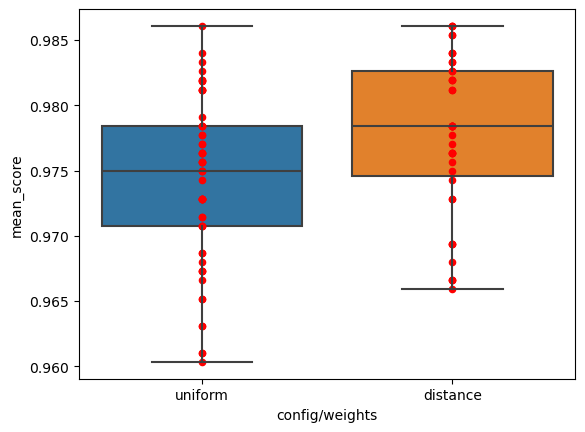

In [ ]:
#| fig-cap: "uniform‰∏édistanceÊñπÊ≥ïÂπ≥ÂùáÂáÜÁ°ÆÁéáÁÆ±Á∫øÂõæÂØπÊØî"
#| fig-alt: "ÊØè‰∏Ä‰∏™Á∫¢ÁÇπÊòØ‰∏ÄÊ¨°ÂÆûÈ™åÁªìÊûúÔºåÂπ≥ÂùáÂáÜÁ°ÆÁéáÊòØÊØè‰∏ÄÊ¨°ÂÆûÈ™å‰∏≠‰∫îÊäò‰∫§ÂèâÈ™åËØÅÁöÑÂπ≥ÂùáÂÄº„ÄÇ"
fig, ax = plt.subplots()
sns.boxplot(data=dfi, x='config/weights', y='mean_score', ax=ax)
dfi.plot(x='config/weights', y='mean_score', ax=ax, kind='scatter', c='red')

‰ª•‰∏äÁöÑÁªìÊûúÂπ∂Ê≤°ÊúâÊéßÂà∂ÂèòÈáèÔºåÊòØÁõ¥Êé•ËøõË°å‰∫Ü‰∏Ä‰∏™ÁªüËÆ°„ÄÇÁõ∏ÂÖ≥ÊÄß‰∏ç‰ª£Ë°®Âõ†ÊûúÊÄßÔºåÊâÄ‰ª•‰∏äÈù¢ÁöÑÁªìÊûú‰ªÖ‰ªÖ‰ª£Ë°®‰∫ÜÂú®Êàë‰ª¨Ë∞ÉÂèÇÈááÊ†∑ËøáÁ®ã‰∏≠ÔºåËá™ÂèòÈáè‚Äúweights‚Äù‰∏éÂõ†ÂèòÈáè‚Äúmean_score‚ÄùÁöÑ‰∏ÄÂÆöÁöÑÁõ∏ÂÖ≥ÊÄß„ÄÇ
Â¶ÇÊûúÊàë‰ª¨‰∏çÁü•ÈÅìÊØè‰∏ÄÊ¨°ÂÆûÈ™åÂÖ∑‰ΩìÁöÑÂÖ∂‰ªñÁöÑÊó†ÂÖ≥ÂèòÈáèÔºå‰∏äÈù¢ÁöÑÂõæÊàë‰ª¨‰πüÂèØ‰ª•ÂÅö‰∏Ä‰∏™ÂêàÁêÜÁöÑÂÅáËÆæÊ£ÄÈ™åÔºàÈ™åËØÅÊàë‰ª¨ÁöÑÂÆûÈ™åÂÅáËÆæÁöÑÈõ∂ÂÅáËÆæÊòØÂê¶Ë¶ÅÊãíÁªùÔºÅÔºâ„ÄÇ

Ê†πÊçÆËÆ∫Êñá[@Dem≈°ar_2006]ÔºåÂú®Êú∫Âô®Â≠¶‰π†‰∏≠Â∫îËØ•‰ΩøÁî®mann-whitney UÊ£ÄÈ™åÂíåWilcoxon signed-rankÊ£ÄÈ™åÔºåÂõ†‰∏∫Ëøô‰∏§‰∏™Ê£ÄÈ™åÂØπÊ†∑Êú¨ÁöÑÂàÜÂ∏ÉÊ≤°ÊúâÂÅáÂÆöÔºåËÄåÂÖ∂‰ªñÁöÑ‰∏Ä‰∫õÊ£ÄÈ™åÊØîÂ¶ÇtÊ£ÄÈ™å‰∏çÂ§™ÈÄÇÁî®‰∏éÊ†∑Êú¨ÂàÜÂ∏É‰∏çÁ¨¶ÂêàÂÅáËÆæÂàÜÂ∏ÉÁöÑÊÉÖÂÜµ„ÄÇÂÖ∂‰∏≠ÂØπ‰∫é ‚Äú‰∏çÁü•ÈÅìÊØè‰∏ÄÊ¨°ÂÆûÈ™åÁöÑÂÖ∂‰ªñÊó†ÂÖ≥ÂèòÈáèÊòØ‰ªÄ‰πà‚ÄùÁöÑÊÉÖÂÜµÔºå‰πüÂ∞±ÊòØËØ¥Ëá™ÂèòÈáèÂèñ‚Äúdistance‚ÄùÂíå‚Äúuniform‚ÄùÂæóÂà∞ÁöÑ‰∏§ÂàóÊ†∑Êú¨ÊòØÁã¨Á´ãÔºàindependentÔºâÁöÑÊó∂ÂÄôÔºåÂ∫îÂΩì‰ΩøÁî®mann-whitney UÊ£ÄÈ™å„ÄÇ

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
grouped = dfi.groupby('config/weights')
group_mean_scores = {name:group['mean_score'] for name, group in grouped}
scores_for_distance = group_mean_scores['distance']
scores_for_uniform = group_mean_scores['uniform']
u, p = mannwhitneyu(scores_for_distance, scores_for_uniform, 
                    alternative='greater' # ÂÆûÈ™åÂ§áÂàôÂÅáËÆæÔºådistance ÊñπÊ≥ïÊõ¥Â•Ω
                    )
if p < 0.05:
    print("Reject null hypothesis! `distance` is significantly better than `uniform`")

Reject null hypothesis! `distance` is significantly better than `uniform`


ÂàöÊâçÊàë‰ª¨Âè™ÊòØÊï¥‰ΩìÂàÜÊûê„ÄÇ
Êé•‰∏ãÊù•Êàë‰ª¨Ë¶ÅÂØªÊâæÊéßÂà∂ÂÖ∂‰ªñÂèòÈáèÊúÄ‰ºòÊó∂Ôºå‰∏§‰∏™ÊñπÊ≥ïÂêÑËá™ÊúÄ‰ºòÁöÑÂèÇÊï∞ÊòØ‰ªÄ‰πàÔºü‰ª•ÂèäËøô‰∏§‰∏™ÊñπÊ≥ïÂØπÂì™‰∫õË∂ÖÂèÇÊï∞ÊØîËæÉÊïèÊÑüÔºü

Êàë‰ª¨ÂÖàÂõûÁ≠îÁ¨¨‰∏Ä‰∏™ÈóÆÈ¢òÔºåÊàë‰ª¨‰ªéÂàöÊâçÁöÑË°®Ê†ºÁ≠õÈÄâ‰∏Ä‰∏ã„ÄÇ

In [ ]:
max_rows = dfi.loc[df.groupby('config/weights')['mean_score'].idxmax()]
max_rows

mean_score  std_score   score_0   score_1   score_2   score_3   score_4  \
3      0.98608   0.003125  0.986111  0.989583  0.982578  0.982578  0.989547   
36     0.98608   0.003125  0.986111  0.989583  0.982578  0.982578  0.989547   

   config/weights  config/n_neighbors config/distance_metric  
3        distance                   1              euclidean  
36        uniform                   1                     l2

ËøôÈáåÊàë‰ª¨ÂèØ‰ª•ÂØπ5Ê¨°ÂÆûÈ™åÁöÑÁªìÊûúËøõË°åÁªüËÆ°ÂàÜÊûêÔºåÁî±‰∫éËøô‰∫îÊ¨°ÂÆûÈ™åÊòØÁõ∏ÂÖ≥ÁöÑÔºåÂç≥Ëøô‰∫îÊ¨°ÂÆûÈ™åÊØè‰∏ÄÊ¨°Áî®ÁöÑÂêå‰∏Ä‰∏™foldÂéªËÆ≠ÁªÉÔºåÊâÄ‰ª•ËøôÈáåÊàë‰ª¨‰∏çÂ∫îÂΩìÁî®mann-whitney UÊ£ÄÈ™åÔºåËøô‰∏ÄÊ¨°Êàë‰ª¨Ë¶ÅÁî®Wilcoxon signed-rankÊ£ÄÈ™å„ÄÇ

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
#| hide
[v for k, v in max_rows.iloc[0].to_dict().items() if k.startswith('score_')]

[0.9861111111111112,
 0.9895833333333334,
 0.9825783972125436,
 0.9825783972125436,
 0.9895470383275261]

In [ ]:

scores_for_distance = [v for k, v in max_rows.iloc[0].to_dict().items() if k.startswith('score_')]
scores_for_uniform = [v for k, v in max_rows.iloc[1].to_dict().items() if k.startswith('score_')]
u, p = wilcoxon(scores_for_distance, scores_for_uniform, 
                zero_method='zsplit',
                    alternative='greater' # ÂÆûÈ™åÂ§áÂàôÂÅáËÆæÔºådistance ÊñπÊ≥ïÊõ¥Â•Ω
                    )
if p> 0.05:
    print("Null hypothesis cannot be rejected, so I have to accept it. ")

Null hypothesis cannot be rejected, so I have to accept it. 


/home/ycm/program_files/managers/conda/envs/hf_ai/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/home/ycm/program_files/managers/conda/envs/hf_ai/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


ÂéüÊù•ÔºåÂΩìÊàë‰ª¨ÊéßÂà∂Êó†ÂÖ≥ÂèòÈáèÊúÄ‰ºòÊó∂Ôºå‰∏§‰∏™ÊñπÊ≥ïÁöÑÊÄßËÉΩËÉΩËææÂà∞‰∏ÄËá¥„ÄÇÂÖ∑‰ΩìÊù•ËØ¥ÔºåËøôÈáåÁßçÊâæÂà∞ÁöÑÊúÄ‰ºòË∂ÖÂèÇÊï∞Ê≠£Â•ΩÊòØËÆ©knnÁöÑk‰∏∫1ÔºåÊâÄ‰ª•Ëøô‰∏™ÊÉÖÂÜµ‰∏ãdistanceÊñπÊ≥ïÂíån_neighborsÊñπÊ≥ïÊ≤°ÊúâÂå∫Âà´„ÄÇÊåâÁÖßË∞∑Ê≠åË∞ÉÂèÇÊâãÂÜåÁöÑÁßëÁ†îÊñπÊ≥ïÔºåÂØπ‰∫éËøô‰∏™Êï∞ÊçÆÈõÜÊù•ËØ¥Â∞±Êó†Ê≥ïËØ¥ÊòéËøô‰∏§‰∏™ÊñπÊ≥ïÁöÑ‰ºòÂä£‰∫Ü„ÄÇ

ÁÑ∂ËÄåÔºåÊàë‰∏™‰∫∫ËÆ§‰∏∫Ôºå‰∏Ä‰∏™ÊñπÊ≥ï‰πãÊâÄ‰ª•Ë¢´Â≠¶ÊúØÁïåËÆ§‰∏∫Êúâ‰ª∑ÂÄºÔºåÂú®‰∫éËøô‰∏™ÊñπÊ≥ïËÉΩË¢´ÂÖ∂‰ªñ‰∫∫followÂíåcite„ÄÇ‰ªÄ‰πàÊ†∑ÁöÑÊñπÊ≥ïËÉΩÂØπÂÖ∂‰ªñ‰∫∫ÁöÑÂ∑•‰ΩúÊúâÂ∏ÆÂä©Ôºå‰ªÄ‰πàÊ†∑ÁöÑÊñπÊ≥ïÂ∞±Êúâ‰ª∑ÂÄº„ÄÇÂΩ¢ÂºèÂåñ‰∏ÄÁÇπÊù•ËØ¥ÔºåÂØπ ‚ÄúÂÖ∂‰ªñ‰∫∫ÁöÑÂ∑•‰Ωú‚ÄùËøô‰∏™ÈöèÊú∫ÂàÜÂ∏ÉËÄåË®ÄÔºåÊàë‰ª¨ÁöÑÊñπÊ≥ï‚ÄúÂ∫îÁî®‰∏äÂéª‰πãÂêéÔºåÊØî‰∏çÂ∫îÁî®Êàë‰ª¨ÁöÑÊñπÊ≥ïÊàñËÄÖ‰ΩøÁî®ÂÖ∂‰ªñÊñπÊ≥ïÊõ¥Â•Ω‚ÄùËøô‰∏™ÈöèÊú∫ÂèòÈáèÁöÑÊúüÊúõÂÄºÂ∞±ÊòØÊàë‰ª¨ÂÅöÁßëÁ†îÂ∫îËØ•ËøΩÊ±ÇÁöÑ‰ª∑ÂÄº„ÄÇ

ÈúÄË¶ÅÊ≥®ÊÑèÁöÑÊòØÔºå‚ÄúÂÖ∂‰ªñ‰∫∫ÁöÑÂ∑•‰Ωú‚ÄùÁî±‰∫é‰ªñ‰ª¨ËÆ°ÁÆóËµÑÊ∫ê‰ª•ÂèäÁ†îÁ©∂ËÄÖËÆ§Áü•ÁöÑÂ±ÄÈôêÔºåÊòØÊØîËæÉ‰∏çÂèØËÉΩ‰∏∫‰Ω†ÁöÑÊñπÊ≥ïË∞ÉÊï¥Êï¥‰∏™ÂÆûÈ™åÊµÅÁ®ãÂÖ∂‰ªñÁöÑÂÖÉÂèÇÊï∞ÊàñËÄÖËØ¥Êó†ÂÖ≥ÂèòÈáèÁöÑ„ÄÇÊç¢Âè•ËØùËØ¥ÔºåÂ¶ÇÊûú‰Ω†ÁöÑÊñπÊ≥ïÈúÄË¶ÅÂÖ∂‰ªñ‰∫∫‰∏∫‰Ω†ÁöÑÊñπÊ≥ïÊù•Ë∞ÉÂèÇÊâçËÉΩË°®Áé∞ËâØÂ•ΩÔºåÈÇ£‰πà‰Ω†ÁöÑÊñπÊ≥ïÁöÑ‰ª∑ÂÄºÂÖ∂ÂÆû‰πüÊòØÊØîËæÉÊúâÈôêÁöÑ„ÄÇ

Âú®ËøôÈáåÊàë‰ª¨Â∞±ÈÅáÂà∞Ëøô‰∏™ÊÉÖÂÜµÔºåÂú®Â§ßÈÉ®ÂàÜÈöèÊú∫ÁöÑÊó†ÂÖ≥ÂèòÈáè‰∏äÔºåÊàë‰ª¨ÁúãÂà∞ÂÅáËÆæÊ£ÄÈ™åÊãíÁªù‰∫ÜÈõ∂ÂÅáËÆæÔºåËØ¥ÊòédistanceÊñπÊ≥ïÊúüÊúõÂú∞Êù•ËØ¥ÊòØÂØπÂÖ∂‰ªñÁ†îÁ©∂‰∫∫ÂëòÊúâÂ∏ÆÂä©ÁöÑÔºåÁÑ∂ËÄåÂΩìË∞ÉÂèÇÂà∞ÊúÄ‰ºòÊó∂Ôºå‰ªñ‰ª¨ÂèàÈÉΩËÉΩËææÂà∞ÊúÄÂ•Ω„ÄÇ


Áé∞Âú®Êàë‰ª¨ÂõûÁ≠îÁ¨¨‰∫å‰∏™ÈóÆÈ¢òÔºåËøô‰∏§‰∏™ÊñπÊ≥ïÂàÜÂà´ÂØπÂÖ∂‰ªñÂÖÉÂèÇÊï∞ÁöÑÊïèÊÑüÊÄßÂ¶Ç‰Ωï?
È¶ñÂÖàÂàÜÊûêÂØπn_neighborsÁöÑÊïèÊÑüÊÄß„ÄÇËøô‰∏™ÊòØÈÄöËøáquasi random searchÈááÊ†∑ÁöÑ„ÄÇ

In [ ]:
import copy

In [ ]:
#| export
# ‰∏∫‰∫ÜËß£ÂÜ≥seabornÂºÄÂèëËÄÖ‰∏çÊÑøÊÑèÊîØÊåÅÁî®Êà∑ÁúãÂà∞ÊãüÂêàÊõ≤Á∫øÂèÇÊï∞ÁöÑÈóÆÈ¢òÔºåÊàë‰ª¨Êü•ÊâæÂà∞‰∫Ü‰∏ãÈù¢ÁöÑËß£ÂÜ≥ÊñπÊ°à
# Êú¨‰ª£Á†ÅÂèÇËÄÉ https://stackoverflow.com/questions/22852244/how-to-get-the-numerical-fitting-results-when-plotting-a-regression-in-seaborn
def regplot(
    *args,
    line_kws=None,
    marker=None,
    scatter_kws=None,
    **kwargs
):
    # this is the class that `sns.regplot` uses
    plotter = sns.regression._RegressionPlotter(*args, **kwargs)

    # this is essentially the code from `sns.regplot`
    ax = kwargs.get("ax", None)
    if ax is None:
        ax = plt.gca()

    scatter_kws = {} if scatter_kws is None else copy.copy(scatter_kws)
    scatter_kws["marker"] = marker
    line_kws = {} if line_kws is None else copy.copy(line_kws)

    plotter.plot(ax, scatter_kws, line_kws)

    # unfortunately the regression results aren't stored, so we rerun
    grid, yhat, err_bands = plotter.fit_regression(plt.gca())

    # also unfortunately, this doesn't return the parameters, so we infer them
    slope = (yhat[-1] - yhat[0]) / (grid[-1] - grid[0])
    intercept = yhat[0] - slope * grid[0]
    return slope, intercept

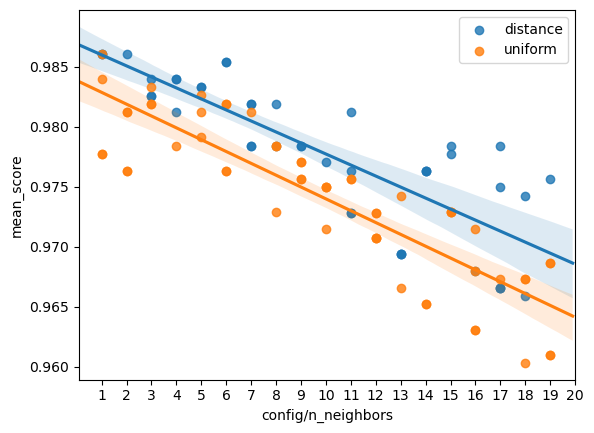

For distance, the regression line is y = -9.18e-04x + 9.87e-01
For uniform, the regression line is y = -9.86e-04x + 9.84e-01


In [ ]:
#| label: fig-n_neighbors
#| fig-cap: "Relationship between n_neighbors and mean_score"
#| fig-alt: "Âú®Âõæ‰∏≠Êàë‰ª¨ÁîªÂá∫‰∫ÜÊãüÂêàÁöÑÁõ¥Á∫ø‰ª•Âèä‰πãÂâçÁöÑ95%ÁΩÆ‰ø°Âå∫Èó¥„ÄÇ"
f = plt.figure()
ax = f.add_subplot(1,1,1)
line_dict = {}
for name, group in grouped:
    # plt.scatter(group['config/n_neighbors'], group['mean_score'], label=name)
    # p = sns.regplot(x='config/n_neighbors', y='mean_score', data=dfi, fit_reg=True, ax=ax)
    k, b = regplot(x='config/n_neighbors', y='mean_score', data=group, label=name, fit_reg=True)
    line_dict[name] = (k, b)
    

# sns.lmplot(x='config/n_neighbors', y='mean_score', data=dfi, hue="config/weights", fit_reg=True)
# ‰ΩøÁî®Êï¥Êï∞xÂùêÊ†áËΩ¥
plt.xticks(range(1, 21))
# plt.xlabel('n_neighbors')
# plt.ylabel('mean_score')
plt.legend()
# plt.title("Relationship between n_neighbors and mean_score")
plt.show()
# p.get_lines()[0].get_xdata(), p.get_lines()[0].get_ydata()
for name, (k, b) in line_dict.items():
    print(f"For {name}, the regression line is y = {k:.2e}x + {b:.2e}")

‰ªéÂõæ @fig-n_neighbors ‰∏≠ÂèØ‰ª•ÁúãÂá∫ÔºåÂú®Êï∞Â≠óËØÜÂà´ÈóÆÈ¢ò‰∏äÔºåÊó†ËÆ∫ÊòØdistanceÊñπÊ≥ïËøòÊòØuniformÊñπÊ≥ïÔºåÈÉΩÊòØneighborsÊï∞ÈáèË∂äÂ§öÔºåÁ≤æÂ∫¶ÂèçËÄåË∂ä‰Ωé„ÄÇ

‰ªéÊñúÁéá‰∏äÊù•ÁúãÂèØËÉΩ‰ºö‰ª•‰∏∫Ëøô‰∏™ÈóÆÈ¢òÂæàÂ∞èÔºåÂè™ÊòØÁ®çÂæÆÂáèÂ∞ë‰∫ÜÁ≤æÂ∫¶Ôºå‰ΩÜÊòØ‰ªéËßÜËßâ‰∏äÂ•ΩÂÉèÁ°ÆÂÆû‰∏ãÈôçÂú∞ÂæàÊòéÊòæ„ÄÇÊàë‰ª¨‰∏∫‰∫Ü‰ªéÁªüËÆ°‰∏äËØ¥ÊòéÊ∏ÖÊ•öÂà∞Â∫ï‰∏ãÈôçÂú∞Êòæ‰∏çÊòæËëóÔºåÂèØ‰ª•Ëøõ‰∏ÄÊ≠•ÈÄöËøáÁöÆÂ∞îÊ£ÆÁõ∏ÂÖ≥Á≥ªÊï∞‰ª•ÂèäÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥Á≥ªÊï∞ÂØπÂ∫îÁöÑÂÅáËÆæÊ£ÄÈ™åÊù•È™åËØÅËøô‰∏™ÈóÆÈ¢ò„ÄÇ

In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
def test_correlation_with(x, y, data, test_func, alpha=0.05):
    correlation, p_value = test_func(data[x], data[y])
    print(f"{test_func.__name__}  correlation coefficient: between {x} and {y}: {correlation}, p-value: {p_value}")
    if p_value < alpha:
        print("The correlation is significant!")
    else:
        print("The correlation is not significant.")

test_correlation_with('config/n_neighbors', 'mean_score', dfi, pearsonr)
test_correlation_with('config/n_neighbors', 'mean_score', dfi, spearmanr)

pearsonr  correlation coefficient: between config/n_neighbors and mean_score: -0.8148057329177487, p-value: 6.1435506488484e-25
The correlation is significant!
spearmanr  correlation coefficient: between config/n_neighbors and mean_score: -0.8085147488740115, p-value: 2.6833127946483235e-24
The correlation is significant!


### ÈôÑÂä†‰ªªÂä°: Â∞ùËØï‰Ωø‚Ω§‰∏çÂêåÁöÑÁ≠ñÁï•Êù•ÊûÑÂª∫ KD Ê†ëÔºå‰ΩøÂæóÂú®ÂàÜÁ±ªÈò∂ÊÆµÂèØ‰ª•ÊúâÊõ¥Âø´ÁöÑÂàÜÁ±ªÊïàÁéá

Ê≥®ÊÑèÊàë‰ª¨ËøôÈáåÊé¢Á¥¢Ë¶Å‰øÆÊîπÁöÑÁõÆÊ†áÊòØÊûÑÂª∫ KD Ê†ëÁöÑËøáÁ®ãÔºå‰πüÂ∞±ÊòØË¶ÅÊîπÂèòKDÊ†ëÁöÑÁªìÊûÑÔºåËÄå‰∏çÊòØ‰øÆÊîπKNNÂàÜÁ±ªÁÆóÊ≥ïÔºå‰∏ªË¶Å‰πü‰∏çÊòØ‰øÆÊîπKDÊ†ëÁöÑÊêúÁ¥¢ÁÆóÊ≥ï„ÄÇ
ËøôÈáåÊàë‰ª¨ÁöÑÁõÆÊ†áÊòØËÆ©ÊêúÁ¥¢ÁöÑÊïàÁéáÊõ¥È´ò„ÄÇ


ÊñáÁåÆ@KD-means‰∏≠ÊÄªÁªì‰∫ÜKDÊ†ëÊûÑÈÄ†Êó∂ÁöÑ‰∏Ä‰∫õÂ∏∏ËßÅÁ≠ñÁï•ÔºåÂÖ∂‰∏≠ÊúÄÈáçË¶ÅÁöÑÂ∞±ÊòØsplitting method„ÄÇÂàÜÂâ≤‰∏Ä‰∏™Áà∂ËäÇÁÇπÁöÑÊó∂ÂÄôÔºåÊàë‰ª¨ÈúÄË¶ÅÂÜ≥ÂÆö1. Âú®Âì™‰∏™Êï∞ÊçÆÁª¥Â∫¶Ôºàùë†ùëëÔºâ‰∏äËøõË°åÂàíÂàÜ 2. Ëøô‰∏™Áª¥Â∫¶‰∏äÂì™‰∏™ÂÄº‰Ωú‰∏∫ÂàíÂàÜÁÇπ„ÄÇÂØπ‰∫éÁ¨¨‰∏ÄÁÇπÔºå‰ΩúËÄÖÈÄâÊã©ËåÉÂõ¥ÊúÄÂπøÁöÑÁª¥Â∫¶Ôºàùëöùëéùë• ‚àí ùëöùëñùëõÔºâÊù•ËøõË°åÂàíÂàÜ„ÄÇ

ÂØπ‰∫éÁ¨¨‰∫åÁÇπÔºå‰ΩúËÄÖÈÄâÊã©‰∫ÜÊªëÂä®‰∏≠ÁÇπÂàÜÂâ≤ËßÑÂàôÔºåÂõ†‰∏∫ÂÆÉÊØîÂÖ∂‰ªñÁªèÂÖ∏ËßÑÂàôÊèê‰æõ‰∫ÜÊõ¥‰ºòÂåñÁöÑÊï∞ÊçÆÁªÑÁªá„ÄÇËøôÁßçËßÑÂàô‰∏ç‰ºö‰∫ßÁîüÁ©∫ËäÇÁÇπÊàñÊï∞ÊçÆÁ©∫Èó¥ÈùûÂ∏∏Á®ÄÁñèÁöÑËäÇÁÇπ„ÄÇ‰∏éÈÄâÊã©‰∏≠‰ΩçÊï∞‰Ωú‰∏∫ÂàáÂâ≤ÂÄºÁöÑÁªèÂÖ∏ËßÑÂàô‰∏çÂêåÔºåÊªëÂä®‰∏≠ÁÇπÂàÜÂâ≤ËßÑÂàôÈÄâÊã©ÁÇπÁöÑ‰∏≠Èó¥ÂÄºÔºàÔºàÊúÄÂ§ßÂÄºùëöùëéùë• + ÊúÄÂ∞èÂÄºùëöùëñùëõÔºâ/ 2ÔºâÔºåËøôÊ†∑ÂÅöÊàêÊú¨Êõ¥‰Ωé„ÄÇ

‰ΩúËÄÖËøòÊèêÂà∞KDÊ†ëÁöÑÊûÑÂª∫ËøáÁ®ã‰∏≠ÂèØ‰ª•ÈôêÂà∂KDÊ†ëÁöÑÊ∑±Â∫¶„ÄÇ‰ΩÜÊòØÊàë‰∏çÂ§™ÊáÇÂ¶ÇÊûúÈôêÂà∂‰∫ÜÊ∑±Â∫¶Ôºå‰∏çÊòØÂè∂Â≠êËäÇÁÇπÁöÑÂú∞ÊñπÂú®ÊêúÁ¥¢Êó∂Â∫îËØ•Â¶Ç‰ΩïÂ§ÑÁêÜÔºåÈÄÄÂåñ‰∏∫Êö¥ÂäõÂêóÔºü

Âú®Êàë‰ª¨ÂÆûÁé∞Êñ∞ÁöÑÁÆóÊ≥ï‰πãÂâçÔºåÊàë‰ª¨È¶ñÂÖàÊµãËØï‰∏Ä‰∏ãÊ≤°ÊîπËøõ‰πãÂâçÁöÑÁÆóÊ≥ïÁöÑÈÄüÂ∫¶„ÄÇ

In [ ]:
#| eval: false
%timeit y_pred = knn_classifier(X_train, y_train, X_test, k_neighbors)

5.07 s ¬± 100 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


Áé∞Âú®Êàë‰ª¨Êù•ÂÆûÁé∞Êõ¥Âø´ÁöÑKDÊ†ë„ÄÇ

In [ ]:
# Â§çÁî®‰∏äÈù¢ÁöÑ‰∏Ä‰∫õÂÆö‰πâ
Node, euclidean_distance

(__main__.Node, <function __main__.euclidean_distance(x1, x2)>)

In [ ]:
#| export
from typing import Callable

In [ ]:
#| export
verbose = False
def fast_build_kd_tree(X, axis_order_list:list, strategy = "median", depth=0):
    if len(X) == 0:
        return None
    k = X.shape[1]
    # Ê†πÊçÆÂΩìÂâçÊ∑±Â∫¶ÔºåÈÄâÊã©ÂàíÂàÜÁöÑÁª¥Â∫¶
    # ÂéüÊú¨ÊòØ 
    # axis = depth % k 
    # axis = axis_order(depth, k)
    assert len(axis_order_list)==k, f"axis_order_list length should be equal to k, but got {len(axis_order_list)} with {axis_order_list}"
    axis = axis_order_list[depth % k]
    if verbose:
        print(" "*4*depth + f"Building kd-tree of depth {depth} with {len(X)} points, axis is {axis}")
    
    # ‰∏≠‰ΩçÊï∞Á≠ñÁï•
    if strategy == "median":
        X = X[X[:, axis].argsort()]
        median = X.shape[0] // 2 #Â∞ÜÂΩìÂâçÁªìÁÇπÊï∞ÊçÆ‰∏ÄÂàÜ‰∏∫‰∫å
        # assert len(np.where((X_train == X[median]).all(axis=1)))>0
        return Node(data=X[median], left=fast_build_kd_tree(X[:median], axis_order_list, strategy, depth + 1),
                    right=fast_build_kd_tree(X[median + 1:],axis_order_list, strategy,  depth + 1))
    
    # ‰∏≠ÁÇπÁ≠ñÁï•
    else:
        x_axis = X[:, axis] # n‰∏™Êï∞
        middle_point_value = (x_axis.max()-x_axis.min()) / 2
        left_points = X[x_axis <= middle_point_value]
        right_points = X[x_axis > middle_point_value]
        distances_on_axis_to_middle = abs(x_axis - middle_point_value)
        closest_point_to_middle = distances_on_axis_to_middle.argmin()
        
        return Node(data=X[closest_point_to_middle], left=fast_build_kd_tree(left_points, axis_order_list,strategy, depth + 1), right=fast_build_kd_tree(right_points, axis_order_list, strategy, depth + 1))
    

In [ ]:
#| export
from queue import PriorityQueue

In [ ]:
#| export
def fast_search_kd_tree(tree, target, axis_order_list:list, k=3):
    if tree is None:
        return []
    # k_nearest = [] #listÁî®‰∫éÂÇ®Â≠òtargetÂΩìÂâçÈÅçÂéÜÂà∞ÁöÑk‰∏™kËøëÈÇª
    # Êàë‰ª¨‰ΩøÁî®‰ºòÂÖàÈòüÂàóÊù•ÂÇ®Â≠òk_nearestÔºå‰ªéËÄåÊèêÈ´òÊïàÁéáÔºå‰ºòÂÖàÈòüÂàó‰∏≠ÁöÑÂÖÉÁ¥†‰∏∫(-Ë∑ùÁ¶ª, ËäÇÁÇπ)ÁöÑÂÖÉÁªÑÔºåË∑ùÁ¶ªËøúÁöÑÂÖàÂèñÂá∫Êù•
    # k_nearest_pq = PriorityQueue(maxsize=k)
    k_nearest_pq = PriorityQueue()
    entry_count = 0
    stack = [(tree, 0)] #Áî®‰∫éÂÇ®Â≠òÂæÖÈÅçÂéÜËäÇÁÇπÁöÑstack
    while stack:
        node, depth = stack.pop() # ËäÇÁÇπÂá∫Ê†à
        if node is None:
            continue
        # print(" "*4*depth + f"node: {node.data}, depth: {depth}")
        distance = euclidean_distance(target, node.data) #ËÆ°ÁÆóÈúÄË¶ÅÂàÜÁ±ªÁöÑÁõÆÊ†áÁÇπ‰∏éËäÇÁÇπÁöÑË∑ùÁ¶ª
        
        # Ë∞ÉÊç¢Âà∞ÂâçÈù¢
        axis = depth % target.shape[0] #ËÆ°ÁÆóÂΩìÂâçÊ∑±Â∫¶ÂØπÂ∫îÁöÑÂàíÂàÜÁª¥Â∫¶
        axis = axis_order_list[axis] # Êñ∞Â¢ûÂä†
        # print(axis)
        
        axis_diff = target[axis] - node.data[axis] #ËÆ°ÁÆóËØ•Áª¥Â∫¶‰∏ãÁõÆÊ†áÁÇπ‰∏éÂΩìÂâçËäÇÁÇπÁöÑÂ∑Æ
        
        #Â¶ÇÊûúk_nearestÊú™Ë£ÖÊª°Êàñk_nearest‰∏≠Áõ∏Ë∑ùÁõÆÊ†áÁÇπÊúÄËøúÁöÑÁÇπ‰∏éÁõÆÊ†áÁÇπÁöÑË∑ùÁ¶ªÂ§ß‰∫éaxis_diffÁöÑÁªùÂØπÂÄºÊó∂ÔºåÂàôÂè¶‰∏ÄËæπÁöÑÂ≠êÊ†ë‰πüÂÖ•Ê†à
        can_omit_another_side = True
        # if len(k_nearest) < k: # ÂΩìk_nearestÊú™Ë£ÖÊª°Êó∂ÔºåÁõ¥Êé•Â∞ÜËäÇÁÇπÊîæÂÖ•
        # if k_nearest.qsize() < k: # ÂΩìk_nearestÊú™Ë£ÖÊª°Êó∂ÔºåÁõ¥Êé•Â∞ÜËäÇÁÇπÊîæÂÖ•
        if k_nearest_pq.qsize() < k: # ÂΩìk_nearestÊú™Ë£ÖÊª°Êó∂ÔºåÁõ¥Êé•Â∞ÜËäÇÁÇπÊîæÂÖ•
        # if not k_nearest_pq.full(): # ÂΩìk_nearestÊú™Ë£ÖÊª°Êó∂ÔºåÁõ¥Êé•Â∞ÜËäÇÁÇπÊîæÂÖ•
            # print(f"not full, put {(-distance, node)}")
            pass #BLANK_1
            # k_nearest.append((node, distance))
            k_nearest_pq.put((-distance, entry_count, node))
            entry_count+=1
            can_omit_another_side = False
        else: #ÂΩìk_nearestË£ÖÊª°Êó∂ÔºåÂØπÊØîËØ•ËäÇÁÇπ‰∏ék_nearest‰∏≠‰∏éÁõÆÊ†áÁÇπË∑ùÁ¶ªÊúÄËøúÁöÑËäÇÁÇπÁöÑË∑ùÁ¶ªÔºåÂ¶ÇÊûúÂ∞è‰∫éÂàôÊõøÊç¢ÔºåÂ¶ÇÊûúÂ§ß‰∫éÂàô‰∏çÊõøÊç¢
            pass #BLANK_2
            farthest = k_nearest_pq.get()
            farthest_distance = -farthest[0]
            # print(f"full, farthest: {farthest}")
            if distance < farthest_distance:
                # print(f"closer, put {(-distance, node)}")
                # assert isinstance(distance, float)
                # print(k_nearest_pq.queue)
                k_nearest_pq.put((-distance, entry_count, node))
                entry_count+=1
            else:
                k_nearest_pq.put(farthest)
            

            if farthest_distance > abs(axis_diff): 
                can_omit_another_side = False
        
        if axis_diff <= 0: #ÂΩìÂ∑ÆÂ∞è‰∫é0Êó∂ÂàôÔºåËØ•ËäÇÁÇπÁöÑÂ∑¶Â≠êÊ†ëÂÖ•Ê†à #Â¶ÇÊûúk_nearestÊú™Ë£ÖÊª°Êàñk_nearest‰∏≠Áõ∏Ë∑ùÁõÆÊ†áÁÇπÊúÄËøúÁöÑÁÇπ‰∏éÁõÆÊ†áÁÇπÁöÑË∑ùÁ¶ªÂ§ß‰∫éaxis_diffÁöÑÁªùÂØπÂÄºÊó∂ÔºåÂàôÂè≥Â≠êÊ†ë‰πüÂÖ•Ê†à
            pass #BLANK_3
            stack.append((node.left, depth+1))
            if not can_omit_another_side:
                stack.append((node.right, depth+1))
        else:#ÂΩìÂ∑ÆÂ§ß‰∫é0Êó∂ÂàôÔºåËØ•ËäÇÁÇπÁöÑÂè≥Â≠êÊ†ëÂÖ•Ê†àÔºå#Â¶ÇÊûúk_nearestÊú™Ë£ÖÊª°Êàñk_nearest‰∏≠Áõ∏Ë∑ùÁõÆÊ†áÁÇπÊúÄËøúÁöÑÁÇπ‰∏éÁõÆÊ†áÁÇπÁöÑË∑ùÁ¶ªÂ§ß‰∫éaxis_diffÁöÑÁªùÂØπÂÄºÊó∂ÔºåÂàôÂ∑¶Â≠êÊ†ë‰πüÂÖ•Ê†à
            pass #BLANK_4
            stack.append((node.right, depth+1))
            if not can_omit_another_side:
                stack.append((node.left, depth+1))
    # return [data for data, _ in k_nearest] #ËøîÂõûÈÅçÂéÜÂÆåÁöÑkdÊ†ëÂêéÁöÑk_nearest
    # return [data for _, data in k_nearest] #ËøîÂõûÈÅçÂéÜÂÆåÁöÑkdÊ†ëÂêéÁöÑk_nearest
    return [k_nearest_pq.get()[-1].data for i in range(k_nearest_pq.qsize())] #ËøîÂõûÈÅçÂéÜÂÆåÁöÑkdÊ†ëÂêéÁöÑk_nearest

In [ ]:
#| export
# Áî±‰∫éÊàë‰ª¨ÈúÄË¶ÅËÆ∞ÂΩïaxis_orderÔºå ÊâÄ‰ª•Ë¶ÅÂÜôÊàêÁ±ª
class FastKDTree:
    def __init__(self, X, split_value_strategy='median', axis_order_strategy='range') -> None:
        n, k = X.shape
        # ÂÜ≥ÂÆö‰∏Ä‰∏ãÂàíÂàÜÁª¥Â∫¶ÁöÑÈ°∫Â∫è
        # ÊñπÂ∑ÆÊúÄÂ§ßÂéüÂàô
        if axis_order_strategy == 'variance':
            self.axis_order_list = np.argsort(np.var(X, axis=0))
        # ÊûÅÂ∑ÆÊúÄÂ§ßÂéüÂàô
        elif axis_order_strategy == 'range':
            self.axis_order_list = np.argsort(np.max(X, axis=0) - np.min(X, axis=0))
        else:
            self.axis_order_list = np.arange(k)
        print(self.axis_order_list)
        self.root = fast_build_kd_tree(X, self.axis_order_list, split_value_strategy, 0)
    def search_kd_tree(self, point, k):
        return fast_search_kd_tree(self.root, point, self.axis_order_list, k)
    
    # ‰ΩøÁî®KNNÁÆóÊ≥ïÂàÜÁ±ª
    def knn_classifier(self, X_train, y_train, X_test, k=3):
        y_pred = []
        for i, test_point in enumerate(X_test):
            k_nearest = self.search_kd_tree(test_point, k)
            # print(k_nearest)
            # print(k_nearest[0])
            # print(np.where((X_train == k_nearest[0]).all(axis=1)))
            labels = [y_train[np.where((X_train == point).all(axis=1))[0][0]] for point in k_nearest]
            counts = np.bincount(labels)#ËÆ°ÁÆók_nearest‰∏≠Ê†∑Êú¨ÊúÄÂ§öÁöÑÊ†áÁ≠æÔºåÈ¢ÑÊµãÁõÆÊ†áÊ†∑Êú¨‰∏∫ËØ•Ê†áÁ≠æ
            y_pred.append(np.argmax(counts))
        return y_pred
try:
    tree = FastKDTree(X_train, split_value_strategy='middle')
except Exception as e:
    print(e)

[ 0 32 39 31 24 56 16  8 40 47 48 23  1 57 15 55 33 38  7  9 30 25 10  4
 14 13 12 11  6  5  3  2 28 29 26 27 19 20 21 22 17 18 42 41 36 37 35 34
 46 45 44 43 51 52 50 49 54 53 58 59 60 61 62 63]
maximum recursion depth exceeded while calling a Python object


Êàë‰ª¨ÂèëÁé∞Â¶ÇÊûúÊòØÁî®middleÁ≠ñÁï•ÔºåÁî±‰∫éÊï∞Â≠óËØÜÂà´Êï∞ÊçÆÈõÜÁöÑÂàÜÂ∏ÉÁâπÊÄßÔºå‰∏≠ÁÇπËÉΩÂàíÂàÜÁöÑÁÇπÂ§™Â∞ëÔºåÊó†Ê≥ïÊàêÂäüÂª∫Ê†ë„ÄÇ

In [ ]:
# tree = FastKDTree(X, split_value_strategy="median")
tree = FastKDTree(X_train, split_value_strategy="median")

[ 0 32 39 31 24 56 16  8 40 47 48 23  1 57 15 55 33 38  7  9 30 25 10  4
 14 13 12 11  6  5  3  2 28 29 26 27 19 20 21 22 17 18 42 41 36 37 35 34
 46 45 44 43 51 52 50 49 54 53 58 59 60 61 62 63]


In [ ]:
for i in range(len(X_train)):
    k_nearest = tree.search_kd_tree(X_train[0], 1)
    where = np.where((X_train == k_nearest[0]).all(axis=1))
    where = where[0]
    assert len(where) == 1

In [ ]:
# k_nearest = tree.search_kd_tree(X_test[0], 2)
# k_nearest = tree.search_kd_tree(X_train[0], 2)
# k_nearest, X_train[0]
# k_nearest = tree.search_kd_tree(X_test[0], 2)
# k_nearest
y_pred = tree.knn_classifier(X_train, y_train, X_test, k_neighbors)
accuracy_score(y_test, y_pred) # Á°Æ‰øùÊï∞ÂÄºÊ≠£Á°Æ

0.9861111111111112

In [ ]:
#| eval: false
%timeit y_pred = tree.knn_classifier(X_train, y_train, X_test, k_neighbors)

5.15 s ¬± 107 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


Êàë‰ª¨ÂèëÁé∞ÈÄüÂ∫¶ÂèòÊÖ¢‰∫ÜÔºÅ
Â¶ÇÊûú‰ΩøÁî®ÊñπÂ∑ÆÊúÄÂ§ßÁ≠ñÁï•Âë¢Ôºü‰ºö‰∏ç‰ºöÊõ¥Â•ΩÔºü

In [ ]:
tree = FastKDTree(X_train, split_value_strategy="median", axis_order_strategy='variance')
y_pred = tree.knn_classifier(X_train, y_train, X_test, k_neighbors)
accuracy_score(y_test, y_pred) # Á°Æ‰øùÊï∞ÂÄºÊ≠£Á°Æ

[ 0 32 39 56 24 16 31  8 40 48 47 23 15  1 57 55  7 63 49 41 25  9 22  6
 33 17 38 14 30 11 62  3 46  4 59  2 12 54 60 58 51 52 10 45 50  5 18 19
 37 29 61 36 27 53 13 28 26 20 21 35 34 44 43 42]


0.9861111111111112

In [ ]:
#| eval: false
%timeit y_pred = tree.knn_classifier(X_train, y_train, X_test, k_neighbors)

5.5 s ¬± 217 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


ÁîöËá≥Êõ¥ÊÖ¢ÔºÅ‰∏∫‰∫ÜÈÅøÂÖçÊòØÂõ†‰∏∫Êàë‰ª¨ÂÆûÁé∞Êñ∞ÁöÑÊñπÊ≥ïÊúâ‰∏ÄÂÆöÁöÑoverheadÔºåÊàë‰ª¨ÂØπÂéüÊú¨ÁöÑÂàíÂàÜÁ≠ñÁï•‰πüÂÅö‰∏ÄÊ¨°ÊµãÈÄü„ÄÇ

In [ ]:
#| eval: false
tree = FastKDTree(X_train, split_value_strategy="median", axis_order_strategy='simple')
%timeit y_pred = tree.knn_classifier(X_train, y_train, X_test, k_neighbors)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
5.37 s ¬± 310 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [ ]:
y_pred = tree.knn_classifier(X_train, y_train, X_test, k_neighbors)
accuracy_score(y_test, y_pred) # Á°Æ‰øùÊï∞ÂÄºÊ≠£Á°Æ

0.9861111111111112

Ê†πÊçÆ‰ª•‰∏äÁªìÊûúÔºåÊàë‰ª¨ÂàùÊ≠•ÂæóÂá∫ÁªìËÆ∫ÔºårangeÂàíÂàÜÊñπÊ≥ïÊØîsimpleÊñπÊ≥ïÂø´ÔºåËÄåsimpleÊñπÊ≥ïÊØîvarianceÊñπÊ≥ïÂø´„ÄÇ